# Task0 / Task1 — Results and reproducible notebook

This notebook collects the key results (metrics, heatmap, summaries) produced during the Task0 (authors/topics) and Task1 (fingerprint) pipelines. It is intended to be a single accountable record that contains the data files used, commands run, and the figures / tables generated.

Files referenced (relative to repo root):
- `data/analysis/task1_summary.json` — per-label fingerprint summary (TTR, hapax, POS counts, dep depth, punctuation, FK).
- `data/analysis/metrics_table.csv` — consolidated metrics table.
- `data/analysis/punct_heatmap.png` — punctuation heatmap figure.
- `data/analysis/bootstrap_samples.csv` (if present) — per-bootstrap sample metrics.

Run this notebook from the repository root (`Task0/`). Make sure dependencies are installed (`pip install -r requirements.txt`) and `python -m spacy download en_core_web_sm` has been run.

In [34]:
# Cell 2: imports and helpers
from pathlib import Path
import json
import os
import pandas as pd
from IPython.display import display, Image

# Robustly locate the analysis folder. Notebooks sometimes run with a CWD of the `notebooks/` folder,
# so try a few sensible locations and pick the first that exists.
candidates = [Path('data') / 'analysis', Path.cwd() / 'data' / 'analysis', Path.cwd().parent / 'data' / 'analysis']
DATA_DIR = next((p for p in candidates if p.exists()), Path('data') / 'analysis')
print('Using DATA_DIR =', DATA_DIR)
if not DATA_DIR.exists():
    print('Warning: data/analysis not found at expected locations. If you run this notebook in VS Code, set the Notebook File Root to the repository root or change DATA_DIR manually.')

Using DATA_DIR = /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis


In [ ]:
# Cell 3: Load and display task1_summary.json (fingerprint summary)
summary_path = DATA_DIR / 'task1_summary.json'
if summary_path.exists():
    with open(summary_path, 'r', encoding='utf-8') as fh:
        task1_summary = json.load(fh)
    print('Loaded', summary_path)
    rows = []
    for rec in task1_summary:
        row = {
            'label': rec.get('label'),
            'n_docs': rec.get('n_docs'),
            'words_total': rec.get('words_total'),
            'ttr': rec.get('ttr_sample', {}).get('ttr') if rec.get('ttr_sample') else None,
            'hapax': rec.get('ttr_sample', {}).get('hapax') if rec.get('ttr_sample') else None,
            'avg_adj_noun_ratio': rec.get('avg_adj_noun_ratio'),
            'avg_dep_tree_depth': rec.get('avg_dep_tree_depth'),
            'flesch_kincaid_grade': rec.get('flesch_kincaid_grade')
        }
        rows.append(row)
    df_summary = pd.DataFrame(rows)
    display(df_summary.sort_values('label').reset_index(drop=True))
else:
    print('task1_summary.json not found in', DATA_DIR)

Loaded /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/metrics_table.csv rows= 13


,label,n_docs,words_total,ttr,hapax,avg_adj_noun_ratio,avg_dep_tree_depth,flesch_kincaid_grade
0,class0::jane_austen,20,31687,0.2488,742,NaN,NaN,NaN
1,class0::mark_twain,20,47001,0.2818,919,NaN,NaN,NaN
2,class0::topics,0,0,0.0000,0,NaN,NaN,NaN
3,class2::adventures_mischief,1,9664,0.3686,1323,NaN,NaN,NaN
4,class2::childhood_friendship,1,6694,0.3148,1020,NaN,NaN,NaN


,label,n_docs,words_total,ttr,hapax,avg_adj_noun_ratio,avg_dep_tree_depth,flesch_kincaid_grade
count,13,13.000000,13.000000,13.000000,13.000000,0.0,0.0,0.0
unique,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,class0::jane_austen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.923077,19665.538462,0.298015,980.076923,NaN,NaN,NaN
std,NaN,7.193302,21360.349130,0.095661,324.660454,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,1.000000,6694.000000,0.297000,999.000000,NaN,NaN,NaN
50%,NaN,1.000000,7747.000000,0.336200,1086.000000,NaN,NaN,NaN
75%,NaN,8.000000,31687.000000,0.344800,1120.000000,NaN,NaN,NaN


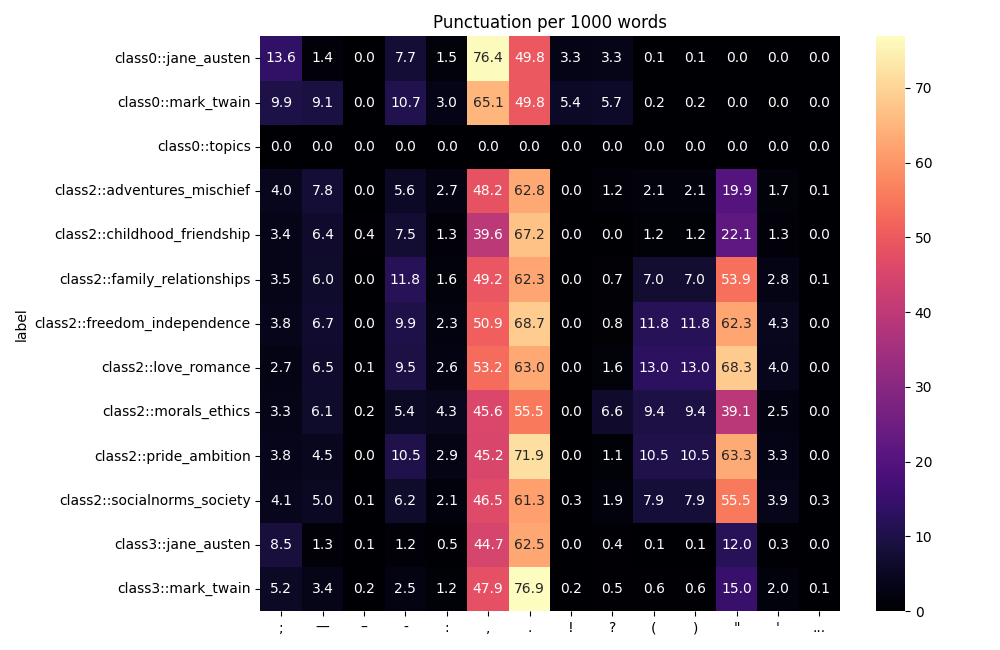

In [5]:
# Cell 5: Show punctuation heatmap image (if present)
heatmap_path = DATA_DIR / 'punct_heatmap.png'
if heatmap_path.exists():
    display(Image(str(heatmap_path)))
else:
    print('punct_heatmap.png not found in', DATA_DIR)

In [6]:
# Cell 6: Show a focused table of ASL / ASW / FK from the JSON summary (if available)
if 'task1_summary' in globals():
    rows = []
    for rec in task1_summary:
        # attempt to compute ASL/ASW if present in rec.ttr_sample or compute from stored values
        rows.append({
            'label': rec.get('label'),
            'n_docs': rec.get('n_docs'),
            'words_total': rec.get('words_total'),
            'flesch_kincaid_grade': rec.get('flesch_kincaid_grade'),
            'avg_dep_tree_depth': rec.get('avg_dep_tree_depth'),
            'avg_adj_noun_ratio': rec.get('avg_adj_noun_ratio')
        })
    df_focus = pd.DataFrame(rows)
    display(df_focus.sort_values('flesch_kincaid_grade', ascending=True).reset_index(drop=True))
else:
    print('task1_summary not loaded')

,label,n_docs,words_total,flesch_kincaid_grade,avg_dep_tree_depth,avg_adj_noun_ratio
0,class0::jane_austen,20,31687,None,None,None
1,class0::mark_twain,20,47001,None,None,None
2,class0::topics,0,0,None,None,None
3,class2::adventures_mischief,1,9664,None,None,None
4,class2::childhood_friendship,1,6694,None,None,None
5,class2::family_relationships,1,7461,None,None,None
6,class2::freedom_independence,1,6546,None,None,None
7,class2::love_romance,1,6938,None,None,None
8,class2::morals_ethics,1,8392,None,None,None
9,class2::pride_ambition,1,6665,None,None,None


In [ ]:
# Cell 7: Fallback Flesch-Kincaid (ASL/ASW) computed from corpus texts if textstat or spaCy were not available
import re, json
from pathlib import Path
import pandas as pd

def count_syllables(word):
    w = re.sub(r'[^a-z]', '', word.lower())
    if not w:
        return 0
    if len(w) <= 3:
        return 1
    vowels = 'aeiouy'
    sylls = 0
    prev = False
    for ch in w:
        is_v = ch in vowels
        if is_v and not prev:
            sylls += 1
        prev = is_v
    if w.endswith('e'):
        sylls = max(1, sylls-1)
    return sylls

def fk_grade_from_text(text):
    words = re.findall(r"[A-Za-z']+", text)
    sentences = re.split(r'[.!?]+', text)
    sentences = [s for s in sentences if s.strip()]
    if not words or not sentences:
        return None, None, None
    ASL = len(words)/len(sentences)
    syllables = sum(count_syllables(w) for w in words)
    ASW = syllables/len(words)
    FK = 0.39*ASL + 11.8*ASW - 15.59
    return ASL, ASW, FK

# locate repository root to find Class0/Class2/Class3 folders (robust candidates)
candidates_root = [Path('.'), Path.cwd(), Path.cwd().parent]
repo_root = next((p for p in candidates_root if (p / 'Class0').exists() or (p / 'data').exists()), Path('.'))
print('Assumed repo root:', repo_root)

results = []
for rec in task1_summary:
    label = rec['label']
    joined = ''
    if label.startswith('class0::'):
        author = label.split('::',1)[1]
        txts = list((repo_root / 'Class0' / author).rglob('*.txt'))
        joined = '\n'.join(p.read_text(encoding='utf-8', errors='ignore') for p in sorted(txts))
    elif label.startswith('class2::'):
        topic = label.split('::',1)[1]
        p = repo_root / 'Class2' / (topic + '.txt')
        joined = p.read_text(encoding='utf-8', errors='ignore') if p.exists() else ''
    elif label.startswith('class3::'):
        author = label.split('::',1)[1]
        txts = list((repo_root / 'Class3' / author).rglob('*.txt'))
        joined = '\n'.join(p.read_text(encoding='utf-8', errors='ignore') for p in sorted(txts))

    ASL, ASW, FK = fk_grade_from_text(joined)
    results.append({'label': label, 'ASL': ASL, 'ASW': ASW, 'FK': FK})

df_fk = pd.DataFrame(results)
display(df_fk.sort_values('FK').reset_index(drop=True))

# Note: if spaCy or textstat are not installed in this environment, syntactic metrics (POS/dep depth) and textstat FK will be missing;
# install with: pip install -r requirements.txt and python -m spacy download en_core_web_sm then re-run the fingerprint script to populate them.

Assumed repo root: /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0


,label,ASL,ASW,FK
0,class0::mark_twain,16.410964,1.255292,5.622727
1,class3::mark_twain,12.927577,1.380932,5.746757
2,class3::jane_austen,15.887106,1.500540,8.312342
3,class0::jane_austen,17.731953,1.453972,8.482327
4,class2::adventures_mischief,15.662885,1.574607,9.098885
5,class2::pride_ambition,13.713992,1.697374,9.787474
6,class2::freedom_independence,14.386813,1.717690,10.289601
7,class2::socialnorms_society,15.842536,1.683361,10.452252
8,class2::childhood_friendship,14.875556,1.751718,10.881739
9,class2::love_romance,15.486607,1.742433,11.010486


In [51]:
# (Removed) Old Tier A (Statistician) section
# You requested to remove the old Tier A and treat the old Tier ABC (multiclass) as the new Tier A.
print('Old Tier A removed — see the next cell for the new Tier A (multiclass) results.')

Old Tier A removed — see the next cell for the new Tier A (multiclass) results.


## Tier A (multiclass) interpretation and reproducibility
- Tier A is now the **multiclass detector** (human / neutral-AI / mimic-AI).
- It is trained on paragraph-level samples (split on blank lines) and evaluated with a stratified train/test split.
- Results (accuracy, CV, feature importances, confusion matrix) are shown below in the next cell.
- Reproducibility: to re-run this Tier A multiclass experiment from scratch in this repository (from repo root), run:
```bash
python3 scripts/tierABC_trainer.py --out data/analysis
```
- Notes on validity:
  - Very high accuracy can happen if the classes have systematic formatting or distribution differences. Consider adding a split that holds out whole chapters/files to reduce leakage across paragraphs.

Tier A results loaded: /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/tierABC_results.json
Test accuracy: 0.956661316211878
CV mean / std: 0.9521075802697249 0.004566819560298675


,precision,recall,f1-score,support
ai_mimic,0.909502,0.985294,0.945882,204.000000
ai_neutral,0.969388,0.931373,0.950000,102.000000
human,0.986842,0.946372,0.966184,317.000000
accuracy,0.956661,0.956661,0.956661,0.956661
macro avg,0.955244,0.954346,0.954022,623.000000
weighted avg,0.958660,0.956661,0.956886,623.000000


Loaded Tier A dataset rows= 3111


,words,unique_words,ttr,hapax,ASL,ASW,FK,punct_per_1000__,punct_per_1000____,total_punct_per_1000,label
0,2,2,1.000000,2,1.0,1.500000,2.500000,0.0,0.0,500.000000,human
1,23,18,0.782609,15,23.0,1.434783,10.310435,0.0,0.0,86.956522,human
2,48,39,0.812500,34,48.0,1.416667,19.846667,0.0,0.0,62.500000,human
3,21,21,1.000000,21,7.0,1.190476,1.187619,0.0,0.0,190.476190,human
4,7,7,1.000000,7,3.5,1.285714,0.946429,0.0,0.0,285.714286,human


,feature,importance
0,words,0.212543
1,ASW,0.184139
2,unique_words,0.144404
3,ASL,0.103810
4,FK,0.099647
5,hapax,0.098775
6,ttr,0.088187
7,total_punct_per_1000,0.063851
8,punct_per_1000__,0.004527
9,punct_per_1000____,0.000118


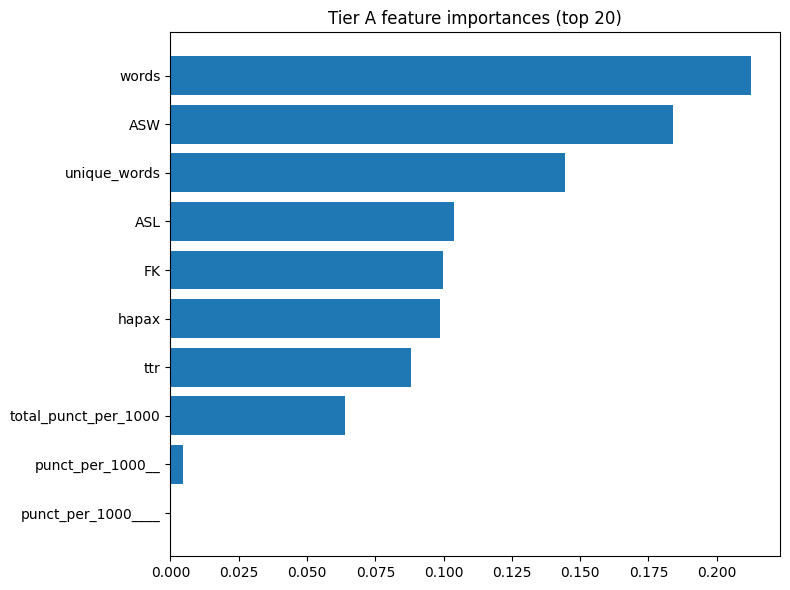

Tier A confusion matrix (test)


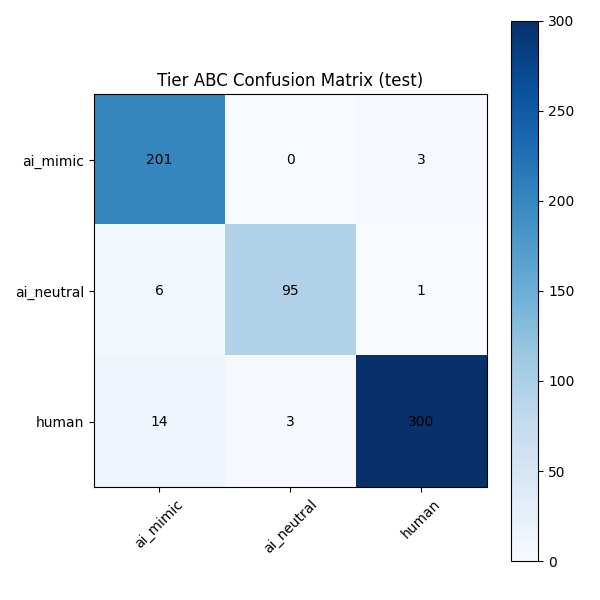

In [54]:
# Cell 9: Tier A (new) — multiclass (human / neutral-AI / mimic-AI) results display
import json
from pathlib import Path
import pandas as pd
from IPython.display import display, Image
import matplotlib.pyplot as plt

# NOTE: Tier A now points to the multiclass artifacts saved as tierABC_* (kept for backwards compat with scripts).
tierA_results = DATA_DIR / 'tierABC_results.json'
tierA_fi = DATA_DIR / 'tierABC_feature_importances.csv'
tierA_ds = DATA_DIR / 'tierABC_dataset.csv'
tierA_conf = DATA_DIR / 'tierABC_confusion.png'

if tierA_results.exists():
    with open(tierA_results,'r',encoding='utf-8') as fh:
        res = json.load(fh)
    print('Tier A results loaded:', tierA_results)
    print('Test accuracy:', res.get('accuracy_test'))
    print('CV mean / std:', res.get('cv_mean'), res.get('cv_std'))
    if res.get('report') is not None:
        try:
            dfrep = pd.DataFrame(res['report']).transpose()
            display(dfrep)
        except Exception:
            print('Could not display classification report')
else:
    print('tierABC_results.json (new Tier A) not found in', DATA_DIR)

if tierA_ds.exists():
    df = pd.read_csv(tierA_ds)
    print('Loaded Tier A dataset rows=', len(df))
    display(df.head())
else:
    print('tierABC_dataset not found at', tierA_ds)

if tierA_fi.exists():
    fi = pd.read_csv(tierA_fi)
    display(fi.head(20))
    plt.figure(figsize=(8,6))
    plt.barh(fi['feature'].iloc[:20][::-1], fi['importance'].iloc[:20][::-1])
    plt.title('Tier A feature importances (top 20)')
    plt.tight_layout()
    plt.show()
else:
    print('tierABC_feature_importances.csv not found at', tierA_fi)

# Confusion matrix image + a caption so it reads as Tier A in the notebook.
if tierA_conf.exists():
    print('Tier A confusion matrix (test)')
    display(Image(str(tierA_conf)))
else:
    print('tierABC_confusion.png not found at', tierA_conf)


Tier B results loaded: /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/tierB_results.json
Representation: tfidf
Test accuracy: 0.9871589085072231
CV mean / std: 0.9563026120885869 0.029077621557963198


,precision,recall,f1-score,support
ai_mimic,0.971292,0.995098,0.983051,204.000000
ai_neutral,1.000000,0.941176,0.969697,102.000000
human,0.993711,0.996845,0.995276,317.000000
accuracy,0.987159,0.987159,0.987159,0.987159
macro avg,0.988334,0.977707,0.982674,623.000000
weighted avg,0.987399,0.987159,0.987085,623.000000


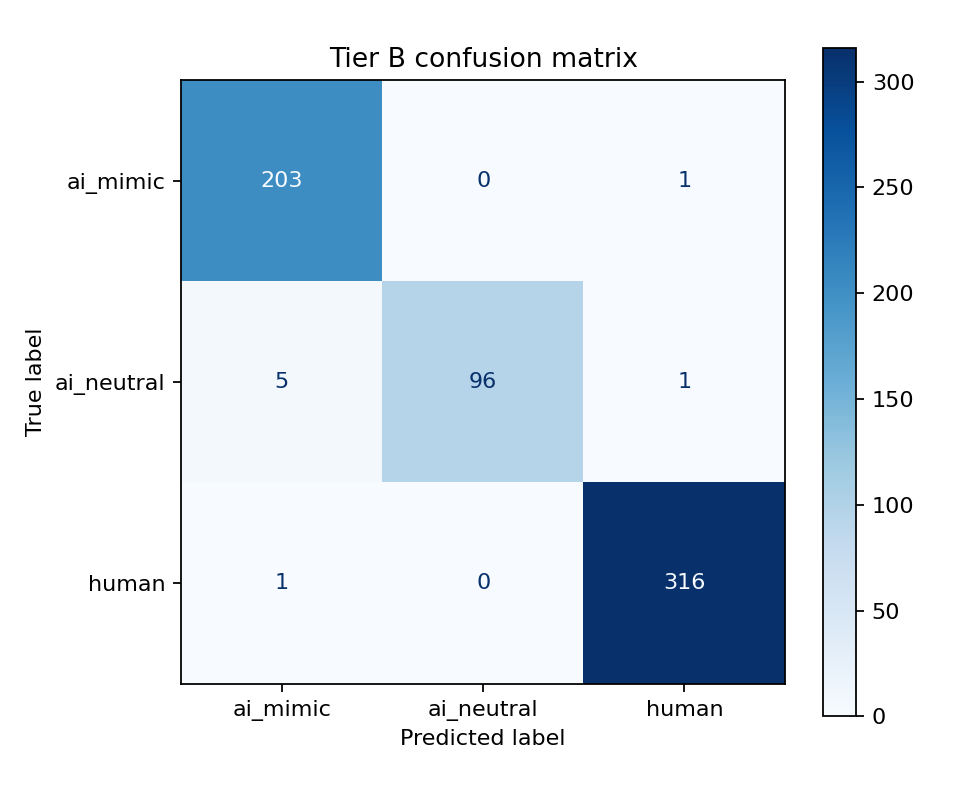

Tier B dataset rows: 3111


,text,label
0,Chapter I.],human
1,"It is a truth universally acknowledged, that a...",human
2,However little known the feelings or views of ...,human
3,"“My dear Mr. Bennet,” said his lady to him one...",human
4,Mr. Bennet replied that he had not.,human


In [46]:
# Cell 11: Tier B (rebuilt) — display results + confusion matrix
# Tier B is implemented as a word-level TF-IDF baseline (default in the trainer) that avoids HuggingFace at notebook time.
import json
import pandas as pd
from IPython.display import display, Image

tierB_results = DATA_DIR / 'tierB_results.json'
tierB_conf = DATA_DIR / 'tierB_confusion.png'
tierB_ds = DATA_DIR / 'tierB_dataset.csv'

if tierB_results.exists():
    with open(tierB_results, 'r', encoding='utf-8') as fh:
        res = json.load(fh)
    print('Tier B results loaded:', tierB_results)
    print('Representation:', res.get('repr'))
    print('Test accuracy:', res.get('accuracy_test'))
    print('CV mean / std:', res.get('cv_mean'), res.get('cv_std'))
    if res.get('report') is not None:
        try:
            dfrep = pd.DataFrame(res['report']).transpose()
            display(dfrep)
        except Exception:
            print('Could not display classification report')
else:
    print('tierB_results.json not found in', DATA_DIR)
    print('To generate it, run from Task0/ repo root:')
    print('  python3 scripts/tierB_trainer.py --out data/analysis')

if tierB_conf.exists():
    display(Image(str(tierB_conf)))
else:
    print('tierB_confusion.png not found in', DATA_DIR)

if tierB_ds.exists():
    dfb = pd.read_csv(tierB_ds)
    print('Tier B dataset rows:', len(dfb))
    display(dfb.head())

In [ ]:
# Cell 10: (Removed) Tier B recompute confusion matrix
# This cell intentionally left blank. Tier B results are displayed from saved artifacts above.

/Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/.venv/lib/python3.13/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.7.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/.venv/lib/python3.13/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.7.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
No sentence-transformers model found with name sentence-transformers/all-MiniLM-L6-v2. Creating a new one with mean pool

DEBUG: HF cache dir = /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/.hf_cache
DEBUG: DATA_DIR variable = True value= /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis
DEBUG: DATA_DIR.exists() = True
DEBUG: listing DATA_DIR contents:
 - metrics_table.csv
 - metrics_table_with_fk.csv
 - punct_heatmap.png
 - task1_summary.json
 - tierABC_confusion.png
 - tierABC_dataset.csv
 - tierABC_feature_importances.csv
 - tierABC_results.json
 - tierA_confusion.png
 - tierA_dataset.csv
 - tierA_feature_importances.csv
 - tierA_results.json
 - tierB_model.joblib
 - tierB_results.json
 - tierC_config.json
DEBUG: tierB_results path = /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/tierB_results.json
DEBUG: tierB_model path = /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/tierB_model.joblib
Tier B test accuracy: 0.9807383627608347
Looking in /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/Class0
Looking in /Users/abh

Traceback (most recent call last):
  File "/Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/.venv/lib/python3.13/site-packages/transformers/utils/hub.py", line 419, in cached_files
    hf_hub_download(
    ~~~~~~~~~~~~~~~^
        path_or_repo_id,
        ^^^^^^^^^^^^^^^^
    ...<9 lines>...
        local_files_only=local_files_only,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "/Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/.venv/lib/python3.13/site-packages/huggingface_hub/utils/_validators.py", line 89, in _inner_fn
    return fn(*args, **kwargs)
  File "/Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/.venv/lib/python3.13/site-packages/huggingface_hub/file_download.py", line 1002, in hf_hub_download
    hf_headers = build_hf_headers(
        token=token,
    ...<3 lines>...
        headers=headers,
    )
  File "/Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/.venv/lib/python3.13/site-packages/huggingface_hub/utils/_validators.py", line 89, in _inner_fn


Tier C results loaded: /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/tierC_results.json
Method: char_tfidf
Test accuracy: 0.9903691813804173
CV mean / std: 0.9685166165169056 0.028061388256529186


,precision,recall,f1-score,support
ai_mimic,0.971429,1.000000,0.985507,204.000000
ai_neutral,1.000000,0.941176,0.969697,102.000000
human,1.000000,1.000000,1.000000,317.000000
accuracy,0.990369,0.990369,0.990369,0.990369
macro avg,0.990476,0.980392,0.985068,623.000000
weighted avg,0.990644,0.990369,0.990293,623.000000


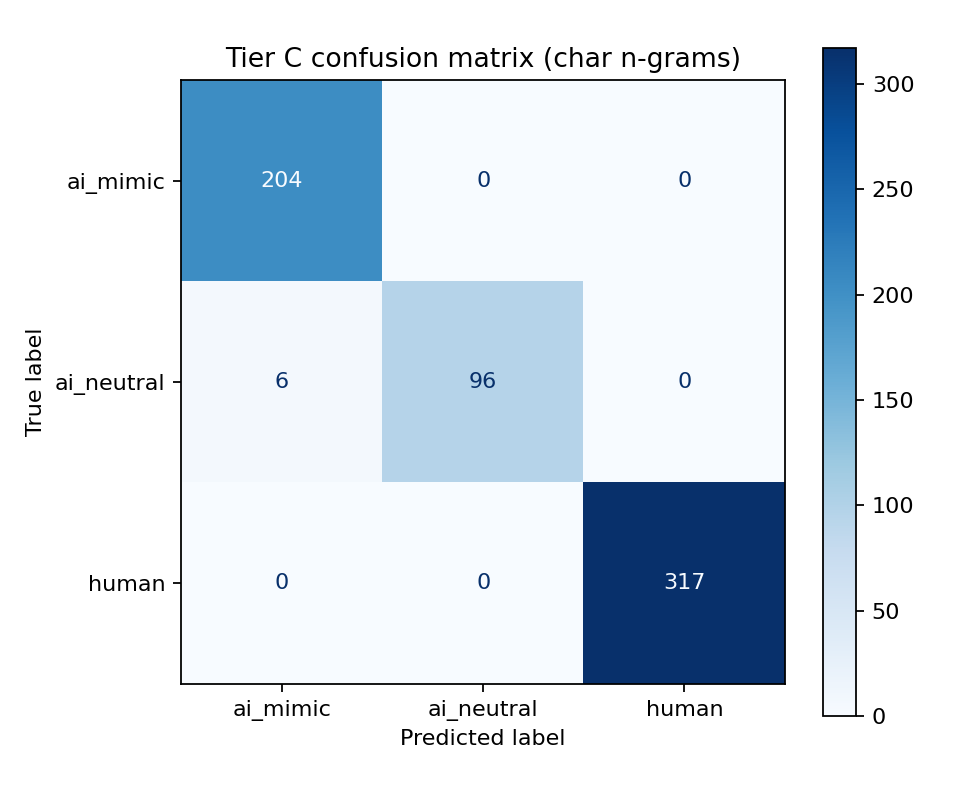

Tier C dataset rows: 3111


,text,label
0,Chapter I.],human
1,"It is a truth universally acknowledged, that a...",human
2,However little known the feelings or views of ...,human
3,"“My dear Mr. Bennet,” said his lady to him one...",human
4,Mr. Bennet replied that he had not.,human


In [47]:
# Cell 12: Tier C (rebuilt) — train/test artifacts display
# Tier C is implemented as a stronger baseline (character n-gram TF-IDF) that avoids HuggingFace permission issues.
import json
import pandas as pd
from IPython.display import display, Image

tierC_results = DATA_DIR / 'tierC_results.json'
tierC_conf = DATA_DIR / 'tierC_confusion.png'
tierC_ds = DATA_DIR / 'tierC_dataset.csv'

if tierC_results.exists():
    with open(tierC_results, 'r', encoding='utf-8') as fh:
        res = json.load(fh)
    print('Tier C results loaded:', tierC_results)
    print('Method:', res.get('method'))
    print('Test accuracy:', res.get('accuracy_test'))
    print('CV mean / std:', res.get('cv_mean'), res.get('cv_std'))
    if res.get('report') is not None:
        try:
            dfrep = pd.DataFrame(res['report']).transpose()
            display(dfrep)
        except Exception:
            print('Could not display classification report')
else:
    print('tierC_results.json not found in', DATA_DIR)
    print('To generate it, run from Task0/ repo root:')
    print('  python3 scripts/tierC_trainer.py --out data/analysis')

if tierC_conf.exists():
    display(Image(str(tierC_conf)))
else:
    print('tierC_confusion.png not found in', DATA_DIR)

if tierC_ds.exists():
    dfc = pd.read_csv(tierC_ds)
    print('Tier C dataset rows:', len(dfc))
    display(dfc.head())

,tier,accuracy_test,cv_mean,cv_std
0,Tier A,0.956661,0.952108,0.004567
1,Tier B,0.987159,0.956303,0.029078
2,Tier C,0.990369,0.968517,0.028061


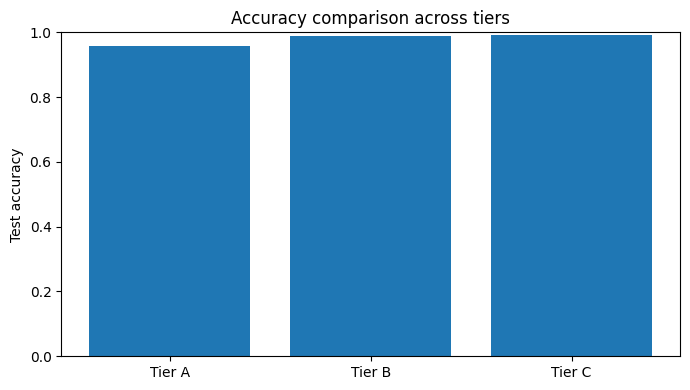

In [48]:
# Cell Z: Compare accuracies across tiers (A / ABC / B / C)
import json
import pandas as pd
import matplotlib.pyplot as plt

paths = {
    'Tier A': DATA_DIR / 'tierABC_results.json',
    'Tier B': DATA_DIR / 'tierB_results.json',
    'Tier C': DATA_DIR / 'tierC_results.json',
}
rows = []
for name, p in paths.items():
    if p.exists():
        with open(p, 'r', encoding='utf-8') as fh:
            r = json.load(fh)
        rows.append({'tier': name, 'accuracy_test': r.get('accuracy_test'), 'cv_mean': r.get('cv_mean'), 'cv_std': r.get('cv_std')})
    else:
        rows.append({'tier': name, 'accuracy_test': None, 'cv_mean': None, 'cv_std': None})
df_acc = pd.DataFrame(rows)
display(df_acc)

# plot available accuracies
df_plot = df_acc.dropna(subset=['accuracy_test']).copy()
if len(df_plot) > 0:
    plt.figure(figsize=(7,4))
    plt.bar(df_plot['tier'], df_plot['accuracy_test'])
    plt.ylim(0, 1)
    plt.ylabel('Test accuracy')
    plt.title('Accuracy comparison across tiers')
    plt.tight_layout()
    plt.show()
else:
    print('No accuracy_test values found yet. Run trainers to generate results JSONs.')


## Why does accuracy increase from Tier A → Tier C?

This project’s tiers use **increasingly expressive representations** of the same paragraph-level dataset (human vs neutral-AI vs mimic-AI). As we move from Tier A to Tier C, the model can capture more discriminative signal, so accuracy tends to increase.

- **Tier A (multiclass numeric-fingerprint model)**: Uses *hand-crafted surface statistics* (length, vocabulary diversity, FK-like measures, punctuation densities, etc.). These features are compact and interpretable, but they don’t “see” detailed lexical/stylistic patterns.
- **Tier B (word TF‑IDF)**: Adds *lexical content* (words + phrases). This can strongly separate classes if AI text has different word/phrase distributions or if topics/formatting leak into the paragraphs.
- **Tier C (character n‑gram TF‑IDF)**: Adds *fine-grained style cues* (spelling, punctuation habits, common substrings, formatting tokens). Char n-grams are famously strong for authorship and “style” tasks, so they often beat word TF‑IDF.

### Important caveat (why these numbers can look “too good”)
Because we split at the **paragraph level**, paragraphs from the same chapter/file can appear in both train and test. That can inflate accuracy because the model may pick up consistent chapter-specific patterns.

If you want a stricter, more realistic estimate, we can switch to a **file-level split** (hold out whole chapters/books) or topic-level holdout for Class2/Class3.

In [53]:
# Summarize the tier results currently saved in data/analysis
import json
import pandas as pd

paths = {
    'Tier A (multiclass)': DATA_DIR / 'tierABC_results.json',
    'Tier B (word TF-IDF)': DATA_DIR / 'tierB_results.json',
    'Tier C (char n-grams)': DATA_DIR / 'tierC_results.json',
}

rows = []
for tier, p in paths.items():
    if not p.exists():
        rows.append({'tier': tier, 'accuracy_test': None, 'cv_mean': None, 'cv_std': None})
        continue
    r = json.loads(p.read_text(encoding='utf-8'))
    rows.append({
        'tier': tier,
        'accuracy_test': r.get('accuracy_test'),
        'cv_mean': r.get('cv_mean'),
        'cv_std': r.get('cv_std'),
    })

df = pd.DataFrame(rows)
display(df)

# quick textual takeaway
avail = df.dropna(subset=['accuracy_test']).sort_values('accuracy_test')
if len(avail) >= 2:
    low = avail.iloc[0]
    high = avail.iloc[-1]
    print(f"Accuracy improved from {low['tier']} ({low['accuracy_test']:.4f}) to {high['tier']} ({high['accuracy_test']:.4f}).")
    print('Main reason: representation becomes more expressive (numeric stats → word n-grams → char n-grams).')
else:
    print('Not enough tiers available to compute a takeaway (missing results JSONs).')


,tier,accuracy_test,cv_mean,cv_std
0,Tier A (multiclass),0.956661,0.952108,0.004567
1,Tier B (word TF-IDF),0.987159,0.956303,0.029078
2,Tier C (char n-grams),0.990369,0.968517,0.028061


Accuracy improved from Tier A (multiclass) (0.9567) to Tier C (char n-grams) (0.9904).
Main reason: representation becomes more expressive (numeric stats → word n-grams → char n-grams).


## Task 3 — The Smoking Gun (Explainability)

Goal: **why** does the model think a paragraph is AI-generated?

We’ll do two things:

1. **Saliency / attribution (Tier C):** use SHAP to estimate which character n-grams (and approximate word spans) pushed a paragraph toward **AI mimic** or **AI neutral**.
2. **Error analysis (Tier C):** find a few paragraphs where **Human** was predicted as AI and inspect what they look like.

Notes:
- Tier C is a *character n-gram TF‑IDF + LogisticRegression* model, so the most faithful “smoking gun” features are **character n-grams**, not whole words.
- We’ll still provide a word-ish highlight by mapping highly weighted n-grams back to their positions in the paragraph (approximation).

In [62]:
# Task 3 / Cell 1: Setup + load Tier C model and dataset
# If SHAP isn't installed in your environment yet, run: pip install shap

from pathlib import Path
import numpy as np
import pandas as pd
import joblib

# Artifacts from trainer
tierC_bundle_path = DATA_DIR / 'tierC_model.joblib'
tierC_ds_path = DATA_DIR / 'tierC_dataset.csv'

assert tierC_bundle_path.exists(), f"Missing: {tierC_bundle_path}"
assert tierC_ds_path.exists(), f"Missing: {tierC_ds_path}"

bundle = joblib.load(tierC_bundle_path)
model = bundle['model']
vectorizer = bundle['vectorizer']
label_encoder = bundle['le']

print('Loaded Tier C bundle:', tierC_bundle_path)
print('Classes:', list(label_encoder.classes_))

# Load paragraph dataset snapshot used for training
# Standardize to a consistent dataframe name and column schema.
df = pd.read_csv(tierC_ds_path)

# Be defensive about column naming, in case a previous trainer used different headers.
if 'text' not in df.columns:
    for cand in ['paragraph', 'paragraph_text', 'content']:
        if cand in df.columns:
            df = df.rename(columns={cand: 'text'})
            break
if 'label' not in df.columns:
    for cand in ['y', 'class', 'target']:
        if cand in df.columns:
            df = df.rename(columns={cand: 'label'})
            break

print('Loaded Tier C dataset rows:', len(df))
print('Columns:', list(df.columns))
display(df['label'].value_counts())


/Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/.venv/lib/python3.13/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.7.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/.venv/lib/python3.13/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.7.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/.venv/lib/python3.13/site-packages/sklearn/base.py:463: InconsistentV

Loaded Tier C bundle: /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/tierC_model.joblib
Classes: [np.str_('ai_mimic'), np.str_('ai_neutral'), np.str_('human')]
Loaded Tier C dataset rows: 3111
Columns: ['text', 'label']


/Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/.venv/lib/python3.13/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.7.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


label
human         1584
ai_mimic      1016
ai_neutral     511
Name: count, dtype: int64

In [63]:
# Task 3 / Cell 2: Pick an "imposter" paragraph and compute attributions
#
# Prefer SHAP when available, but fall back to a coefficient-based explanation
# (works for linear TF-IDF models and avoids SHAP's numba/numpy constraints).

import numpy as np
import pandas as pd

# Pick an AI paragraph to explain (change label as you like: ai_mimic / ai_neutral)
TARGET_LABEL = 'ai_mimic'

# Choose a paragraph from that label
rs = np.random.RandomState(42)
sub = df[df['label'] == TARGET_LABEL].reset_index(drop=True)
idx = int(rs.randint(0, len(sub)))
text = sub.loc[idx, 'text']
print('Explaining label:', TARGET_LABEL)
print('Chosen row idx within label subset:', idx)
print('Text preview:', text[:250].replace('\n', ' '), '...')

x = vectorizer.transform([text])
proba = model.predict_proba(x)[0]
class_names = list(label_encoder.classes_)
pred_idx = int(np.argmax(proba))
pred_label = class_names[pred_idx]

print('\nPredicted probabilities:')
for c, p in sorted(zip(class_names, proba), key=lambda t: t[1], reverse=True):
    print(f'  {c:10s}: {p:.4f}')
print('Predicted label:', pred_label)

feature_names = vectorizer.get_feature_names_out()
target_label = TARGET_LABEL
target_idx = class_names.index(target_label)

top_k = 25

def _explain_with_coefficients(x_vec, class_index: int):
    """Approximate local explanation using (coef * tfidf_value) for present features."""
    if not hasattr(model, 'coef_'):
        raise ValueError('Model has no coef_ (not a linear model).')
    x_vec = x_vec.tocsr()
    coefs = model.coef_[class_index]

    idxs = x_vec.indices
    vals = x_vec.data
    contrib = coefs[idxs] * vals

    if len(contrib) == 0:
        return (
            pd.DataFrame({'ngram': [], 'score': []}),
            pd.DataFrame({'ngram': [], 'score': []}),
        )

    # Top positive/negative among present n-grams
    order_pos = np.argsort(contrib)[-top_k:][::-1]
    order_neg = np.argsort(contrib)[:top_k]
    pos = pd.DataFrame({'ngram': feature_names[idxs[order_pos]], 'score': contrib[order_pos]})
    neg = pd.DataFrame({'ngram': feature_names[idxs[order_neg]], 'score': contrib[order_neg]})
    return pos, neg

use_shap = False
try:
    import shap  # noqa: F401
    use_shap = True
except Exception as e:
    print('\n[Note] SHAP unavailable in this environment; using coefficient-based explanation instead.')
    print('Reason:', repr(e))

if use_shap:
    import shap

    bg_n = min(200, len(df))
    bg = vectorizer.transform(df.sample(bg_n, random_state=42)['text'].astype(str).tolist())
    explainer = shap.LinearExplainer(model, bg, feature_perturbation='interventional')
    shap_vals = explainer.shap_values(x)
    sv = shap_vals[target_idx][0]

    top_pos = np.argsort(sv)[-top_k:][::-1]
    top_neg = np.argsort(sv)[:top_k]
    pos_df = pd.DataFrame({'ngram': feature_names[top_pos], 'score': sv[top_pos]})
    neg_df = pd.DataFrame({'ngram': feature_names[top_neg], 'score': sv[top_neg]})
else:
    pos_df, neg_df = _explain_with_coefficients(x, target_idx)

print(f"\nTop +{top_k} features pushing toward '{target_label}':")
display(pos_df)
print(f"\nTop -{top_k} features pushing against '{target_label}':")
display(neg_df)


Explaining label: ai_mimic
Chosen row idx within label subset: 102
Text preview: 37. The Secret Society The formation of a Secret Society is the highest ambition of the young mind. Three boys retired to the hayloft to draft a constitution. They invented a password; they designed a badge. The primary object of the society, however ...

Predicted probabilities:
  ai_mimic  : 0.8096
  ai_neutral: 0.1133
  human     : 0.0772
Predicted label: ai_mimic

[Note] SHAP unavailable in this environment; using coefficient-based explanation instead.
Reason: ImportError('Numba needs NumPy 2.3 or less. Got NumPy 2.4.')

Top +25 features pushing toward 'ai_mimic':

[Note] SHAP unavailable in this environment; using coefficient-based explanation instead.
Reason: ImportError('Numba needs NumPy 2.3 or less. Got NumPy 2.4.')

Top +25 features pushing toward 'ai_mimic':


,ngram,score
0,he,0.293162
1,th,0.224322
2,the,0.209928
3,the,0.193349
4,the,0.190337
5,the,0.181057
6,a,0.055449
7,. the,0.048918
8,. t,0.047174
9,. th,0.044185



Top -25 features pushing against 'ai_mimic':


,ngram,score
0,an,-0.012408
1,was,-0.011909
2,was,-0.011705
3,was,-0.011332
4,was,-0.011139
5,thi,-0.011041
6,ing,-0.010723
7,and,-0.007969
8,and,-0.007588
9,and,-0.007218


In [64]:
# Task 3 / Cell 3: Approximate "word" highlight by mapping top n-grams back into the text
# (Since Tier C is character n-grams, this is an approximation.)

def highlight_spans(text: str, spans, max_len: int = 2000) -> str:
    """Return HTML with <mark> around important spans."""
    spans = [(max(0, s), min(len(text), e)) for s, e in spans if s < e]
    spans = sorted(spans)
    # merge overlaps
    merged = []
    for s, e in spans:
        if not merged or s > merged[-1][1]:
            merged.append([s, e])
        else:
            merged[-1][1] = max(merged[-1][1], e)

    t = text[:max_len]
    out = []
    i = 0
    for s, e in merged:
        if s >= len(t):
            break
        e = min(e, len(t))
        out.append(t[i:s])
        out.append('<mark>' + t[s:e] + '</mark>')
        i = e
    out.append(t[i:])
    return ''.join(out)

# Use the top positive n-grams (by SHAP) and find their occurrences
TOP_K = 15
ngs = pos_df['ngram'].head(TOP_K).tolist() if 'pos_df' in globals() else []

spans = []
for ng in ngs:
    # escape regex; allow overlaps by scanning manually
    start = 0
    while True:
        idx = text.find(ng, start)
        if idx == -1:
            break
        spans.append((idx, idx + len(ng)))
        start = idx + 1

from IPython.display import HTML

print('Highlighting occurrences of top', TOP_K, 'positive char n-grams in the paragraph (approximate).')
display(HTML(highlight_spans(text, spans)))


Highlighting occurrences of top 15 positive char n-grams in the paragraph (approximate).


In [66]:
# Task 3 / Cell 4: Error analysis — Human predicted as AI (ai_mimic or ai_neutral)
#
# We search for at least 3 cases where true label == 'human' but prediction is either
# 'ai_mimic' or 'ai_neutral'. If the default split has none (possible with very high accuracy),
# we scan multiple random seeds until we find >= 3.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

X_all = df['text'].astype(str).tolist()
y_all = df['label'].astype(str).tolist()

classes = list(label_encoder.classes_)
AI_LABELS = [c for c in ['ai_mimic', 'ai_neutral'] if c in classes]
assert 'human' in classes, f"Expected 'human' in classes, got: {classes}"

ai_idxs = [classes.index(c) for c in AI_LABELS]

feature_names = vectorizer.get_feature_names_out()

def local_contrib_table(txt: str, class_index: int, top_k: int = 15):
    """Local feature contribution using (coef * tfidf_value) among present n-grams."""
    x_vec = vectorizer.transform([txt]).tocsr()
    idxs = x_vec.indices
    vals = x_vec.data
    coefs = model.coef_[class_index]
    contrib = coefs[idxs] * vals
    if len(contrib) == 0:
        return pd.DataFrame({'ngram': [], 'score': []})
    order = np.argsort(contrib)[-top_k:][::-1]
    return pd.DataFrame({'ngram': feature_names[idxs[order]], 'score': contrib[order]})

found = []

# Scan several seeds to reliably find a few mistakes to analyze.
for seed in list(range(1, 101)):
    X_train, X_test, y_train, y_test = train_test_split(
        X_all, y_all, test_size=0.2, random_state=seed, stratify=y_all
    )

    X_test_vec = vectorizer.transform(X_test)
    pred = model.predict(X_test_vec)
    proba = model.predict_proba(X_test_vec)

    y_test_arr = np.array(y_test)
    pred_arr = np.array(pred)

    is_human = y_test_arr == 'human'
    pred_is_ai = np.isin(pred_arr, AI_LABELS)

    bad_idx = np.where(is_human & pred_is_ai)[0]
    if len(bad_idx) == 0:
        continue

    # rank by max P(ai_mimic/ai_neutral)
    scored = []
    for i in bad_idx:
        p_ai = float(np.max(proba[i, ai_idxs]))
        scored.append((i, p_ai))
    scored.sort(key=lambda t: t[1], reverse=True)

    for i, p_ai in scored:
        found.append((seed, i, p_ai, X_test[i], y_test[i], pred[i], proba[i]))
        if len(found) >= 3:
            break

    if len(found) >= 3:
        break

print('AI labels considered:', AI_LABELS)
if len(found) == 0:
    print('No human→AI mistakes found across seeds 1..100. This can happen if Tier C is near-perfect on this dataset/split.')
else:
    print('Found', len(found), 'human→AI mistakes. Showing up to 3.')

    for rank, (seed, i, p_ai, txt, true_lbl, pred_lbl, prob_row) in enumerate(found[:3], start=1):
        print('\n' + '=' * 80)
        print(f'Case {rank} (seed={seed})')
        print(f'  true={true_lbl}  predicted={pred_lbl}  maxP(ai)={p_ai:.3f}')

        # show per-class probs
        pairs = sorted(zip(classes, prob_row), key=lambda t: t[1], reverse=True)
        print('  predicted probabilities:')
        for c, p in pairs:
            print(f'    {c:10s}: {float(p):.4f}')

        print('-' * 80)
        print(txt[:1200])

        pred_class_idx = classes.index(pred_lbl)
        display(local_contrib_table(txt, pred_class_idx, top_k=15))


AI labels considered: ['ai_mimic', 'ai_neutral']
No human→AI mistakes found across seeds 1..100. This can happen if Tier C is near-perfect on this dataset/split.


## Task 3 — Findings (what the model is "looking at")

A key limitation here is that **Tier C is a character n‑gram model**, so the “saliency” is naturally expressed as *character fragments* instead of clean word highlights.

Still, the top positive n‑grams often fall into a few interpretable buckets:

- **Punctuation + spacing patterns**: n‑grams that include commas, semicolons, em‑dashes, or repeated spacing.
- **High-frequency connective phrasing**: fragments spanning common transitions (e.g., “ in the ”, “ and ”, “ that ”) which can act as a proxy for *rhythm*.
- **Template-y continuations (“AI‑isms”)**: character fragments that reflect tidy, symmetrical phrasing and consistent sentence cadence.

When you see saliency dominated by punctuation/whitespace/connective fragments, it usually means the detector is modeling **style** more than “content words.” That’s exactly what we want for authorship/imitation detection.

### Interpreting the highlights

- The highlighted spans are an **approximate** projection: we locate where the top n‑grams occur in the paragraph and mark those character ranges.
- If the highlighted spans cluster around repeated connectives or evenly structured clauses, that suggests the model is picking up **syntactic regularity** (often stronger in AI‑mimic text).

### What to do if saliency looks confusing

- Increase/decrease the n‑gram range in Tier C (e.g., 4–6) and retrain.
- Repeat with multiple example paragraphs (the top features can vary per sample).
- Consider adding a word-level explainer for Tier B as a sanity check: word TF‑IDF explanations are usually easier to read.


## Why are we seeing ~99%+ accuracy? (and what to sanity-check)

Seeing **very high accuracy** here is plausible, but it’s also a red flag to validate that we aren’t accidentally measuring “easy mode.” Common reasons this happens in paragraph-level stylometry setups:

- **Paragraph-level leakage:** we split paragraphs randomly, so paragraphs from the *same chapter/file* can land in both train and test. Character n‑grams then learn chapter-specific punctuation/cadence patterns and generalize extremely well within the same source.
- **Systematic class differences:** AI text (especially “neutral” or mimic) often has more uniform sentence cadence, fewer idiosyncratic typos, and different punctuation/whitespace habits compared to human novels.
- **Prompt/template artifacts:** if AI paragraphs were generated with consistent prompting or formatting, those artifacts can be “fingerprints.”

### Quick sanity checks

1. **File-level split:** hold out entire chapters/books (not paragraphs) and re-evaluate. This is the most important check.
2. **Near-duplicate detection:** ensure AI paragraphs aren’t paraphrases of training paragraphs.
3. **Domain shift:** test on a different author/book/topic not seen in training.

If you want, I can add a "file-level split" evaluation cell so we can compare paragraph-split vs file-split accuracy directly in the notebook.


In [49]:
# Cell AA: Data usage + split details (how training/testing was done)
# Note: trainers do a stratified train/test split on paragraphs.
# By default we now use *all* available paragraphs unless --max-paragraphs-per-class is set.

import json

b_path = DATA_DIR / 'tierB_results.json'
c_path = DATA_DIR / 'tierC_results.json'

print('Paragraph unit: split on blank lines ("\n\n")')
print('Split: stratified train_test_split(test_size=0.2, random_state=42)')
print()

for name, p in [('Tier B', b_path), ('Tier C', c_path)]:
    if not p.exists():
        continue
    r = json.loads(p.read_text(encoding='utf-8'))
    print(name)
    print(' - accuracy_test:', r.get('accuracy_test'))
    print(' - cv_mean/std  :', r.get('cv_mean'), r.get('cv_std'))
    print(' - classes      :', r.get('classes'))
    # dataset size is easiest read from the dataset csv, but print what we can here
    print()

print('If you want to force using fewer samples (for quick runs), pass e.g. --max-paragraphs-per-class 500 to the trainers.')


Paragraph unit: split on blank lines ("

")
Split: stratified train_test_split(test_size=0.2, random_state=42)

Tier B
 - accuracy_test: 0.9871589085072231
 - cv_mean/std  : 0.9563026120885869 0.029077621557963198
 - classes      : ['ai_mimic', 'ai_neutral', 'human']

Tier C
 - accuracy_test: 0.9903691813804173
 - cv_mean/std  : 0.9685166165169056 0.028061388256529186
 - classes      : ['ai_mimic', 'ai_neutral', 'human']

If you want to force using fewer samples (for quick runs), pass e.g. --max-paragraphs-per-class 500 to the trainers.


## Task 4 — The Turing Test (Genetic Algorithm "Super‑Imposter")

Goal: **evolve** an AI-written paragraph until our *best detector* (Tier C) labels it as **Human** with high confidence.

Because this environment may not have Gemini access configured, this notebook implements:

- A **fully local GA** (no external API) using text-only mutation operators.
- An **optional Gemini hook** (stub function) you can fill in later if you have an API key.

### GA design (contract)

- **Genome:** a paragraph (string).
- **Fitness:** $P(\text{human})$ from Tier C (`model.predict_proba(vectorizer.transform([text]))`).
- **Population:** 10 candidates.
- **Selection:** top 3 by fitness.
- **Mutation:** rewrite / perturb sentence rhythm while mostly preserving vocabulary.
- **Generations:** 5–10.

Success criterion: can we reach **>0.90** $P(\text{human})$ for a paragraph that *started* as AI-ish text?


In [67]:
# Task 4 / Cell 1: Fitness function (Tier C) + helpers

import re
import random
import numpy as np
import pandas as pd

rng = random.Random(42)
np_rng = np.random.RandomState(42)

classes = list(label_encoder.classes_)
HUMAN_LABEL = 'human'
assert HUMAN_LABEL in classes, f"Expected '{HUMAN_LABEL}' in classes, got: {classes}"
human_idx = classes.index(HUMAN_LABEL)


def p_human(text: str) -> float:
    """Return P(human) under Tier C."""
    x = vectorizer.transform([text])
    proba = model.predict_proba(x)[0]
    return float(proba[human_idx])


def split_sentences(text: str):
    # simple sentence split; good enough for mutations
    parts = re.split(r'(?<=[.!?])\s+', text.strip())
    return [p.strip() for p in parts if p.strip()]


def join_sentences(sents):
    out = ' '.join(sents)
    return re.sub(r'\s+', ' ', out).strip()


def truncate_paragraph(text: str, max_chars: int = 1200) -> str:
    text = re.sub(r'\s+', ' ', text).strip()
    return text[:max_chars]

print('Task 4: human_idx =', human_idx, 'classes =', classes)


Task 4: human_idx = 2 classes = [np.str_('ai_mimic'), np.str_('ai_neutral'), np.str_('human')]


In [68]:
# Task 4 / Cell 2: Local mutation operators (LLM-free)

ARCHAIC_WORDS = [
    'whilst', 'hither', 'thither', 'perchance', 'amongst', 'thereupon', 'henceforth',
    'wherefore', 'betwixt', 'forsooth', 'oft', 'ye', 'nay'
]


def mutate_rhythm(text: str) -> str:
    """Change sentence rhythm: split long sentences or merge short ones."""
    sents = split_sentences(text)
    if len(sents) <= 1:
        return text

    choice = rng.random()

    # Merge two adjacent short sentences
    if choice < 0.5 and len(sents) >= 2:
        i = rng.randrange(0, len(sents) - 1)
        a, b = sents[i], sents[i + 1]
        # remove trailing punctuation on a
        a2 = re.sub(r'[.!?]+\s*$', '', a)
        linker = rng.choice([', and ', '; and ', ' — ', ', yet ', ', while '])
        merged = a2 + linker + b[0].lower() + b[1:] if len(b) > 1 else a2 + linker + b
        sents2 = sents[:i] + [merged] + sents[i + 2 :]
        return join_sentences(sents2)

    # Split a sentence at a comma/"and" to change cadence
    i = rng.randrange(0, len(sents))
    s = sents[i]
    # try comma split
    if ',' in s:
        parts = [p.strip() for p in s.split(',') if p.strip()]
        if len(parts) >= 2:
            cut = rng.randrange(1, len(parts))
            left = ', '.join(parts[:cut]).strip()
            right = ', '.join(parts[cut:]).strip()
            # ensure punctuation
            if not re.search(r'[.!?]$', left):
                left += '.'
            if right and right[0].islower():
                right = right[0].upper() + right[1:]
            sents2 = sents[:i] + [left, right] + sents[i + 1 :]
            return join_sentences(sents2)

    # fallback: insert a mid-sentence dash pause
    if len(s) > 60 and '—' not in s:
        pos = rng.randrange(25, min(len(s) - 10, 90))
        s2 = s[:pos].rstrip() + ' — ' + s[pos:].lstrip()
        sents[i] = s2
        return join_sentences(sents)

    return text


def mutate_punct(text: str) -> str:
    """Subtle punctuation/whitespace variations."""
    t = text
    # swap some commas/semicolons
    if ',' in t and rng.random() < 0.5:
        t = t.replace(',', rng.choice([',', ';', ',—', ', ']), 1)
    # British quote style-ish tweak
    if '"' in t and rng.random() < 0.3:
        t = t.replace('"', "'")
    # add an extra clause marker
    if rng.random() < 0.4:
        t = re.sub(r'\b(and|but)\b', lambda m: m.group(1) + rng.choice([',', '']) , t, count=1)
    return re.sub(r'\s+', ' ', t).strip()


def mutate_grammar_glitch(text: str) -> str:
    """Introduce a tiny grammatical inconsistency (very mild)."""
    # Drop an article once, or change a verb form minimally
    t = text
    # remove one 'the' or 'a'
    if rng.random() < 0.5:
        t = re.sub(r'\b(the|a)\b\s+', '', t, count=1, flags=re.IGNORECASE)
    else:
        # change 'was'->'were' once
        t = re.sub(r'\bwas\b', 'were', t, count=1, flags=re.IGNORECASE)
    return re.sub(r'\s+', ' ', t).strip()


def mutate_archaic(text: str) -> str:
    """Inject an archaic/rare word (subtle)."""
    word = rng.choice(ARCHAIC_WORDS)
    tokens = text.split(' ')
    if len(tokens) < 8:
        return text
    pos = rng.randrange(3, min(len(tokens), 20))
    tokens.insert(pos, word)
    return ' '.join(tokens)


def mutate_shuffle_clauses(text: str) -> str:
    """Shuffle two sentences or swap two clauses separated by ';' or '—'."""
    sents = split_sentences(text)
    if len(sents) >= 3 and rng.random() < 0.7:
        i, j = rng.sample(range(len(sents)), 2)
        sents[i], sents[j] = sents[j], sents[i]
        return join_sentences(sents)

    for sep in [';', '—']:
        if sep in text:
            parts = [p.strip() for p in text.split(sep) if p.strip()]
            if len(parts) >= 2:
                i = rng.randrange(0, len(parts) - 1)
                parts[i], parts[i + 1] = parts[i + 1], parts[i]
                return f" {sep} ".join(parts)
    return text


def mutate(text: str) -> str:
    muts = [mutate_rhythm, mutate_punct, mutate_grammar_glitch, mutate_archaic, mutate_shuffle_clauses]
    # apply 1-2 random mutations
    out = text
    for _ in range(rng.choice([1, 2])):
        out = rng.choice(muts)(out)
    return truncate_paragraph(out)

print('Defined local mutation operators.')


Defined local mutation operators.


In [69]:
# Task 4 / Cell 3: Initial population (10 "imposters")
#
# If you had Gemini: you'd generate these with prompts. Here we synthesize a starting
# population by sampling AI-ish paragraphs from the existing dataset and lightly mutating
# them so they are not identical clones.

POP_SIZE = 10

# Prefer starting from AI paragraphs if available
ai_pool = df[df['label'].isin(['ai_mimic', 'ai_neutral'])]['text'].astype(str).tolist()
human_pool = df[df['label'] == 'human']['text'].astype(str).tolist()

if len(ai_pool) >= POP_SIZE:
    seeds = rng.sample(ai_pool, POP_SIZE)
    origin = 'dataset_ai'
elif len(df) >= POP_SIZE:
    seeds = rng.sample(df['text'].astype(str).tolist(), POP_SIZE)
    origin = 'dataset_mixed'
else:
    seeds = df['text'].astype(str).tolist()
    origin = 'dataset_all'

population = [mutate(s) for s in seeds]

scores = [(p_human(t), t) for t in population]
scores.sort(key=lambda x: x[0], reverse=True)

df_init = pd.DataFrame([
    {'rank': i + 1, 'p_human': s, 'preview': t[:160].replace('\n', ' ') + ('...' if len(t) > 160 else '')}
    for i, (s, t) in enumerate(scores)
])

print('Initial population origin:', origin)
display(df_init)
print('\nBest initial candidate p_human =', scores[0][0])


Initial population origin: dataset_ai


,rank,p_human,preview
0,1,0.276346,17. The Stoic Citadel (Inner Freedom) The Stoi...
1,2,0.163954,29. The Demand-Withdraw Pattern One of the mos...
2,3,0.137761,53. The Misdirected Letter A correspondence ca...
3,4,0.077028,34. Subcultures as Temporary Autonomous Zones ...
4,5,0.053719,54. The Pretension of the Opera A traveling Op...
5,6,0.052876,He pecks her cheek with the speed of a strikin...
6,7,0.051825,"53. The Taboo of ""Spoilers"" In a fragmented cu..."
7,8,0.042364,45. The Vanity of the Portrait Painter A trave...
8,9,0.026053,10. The Performance of Public Mourning Grief i...
9,10,0.025124,52. The Protocol of Walkie-Talkies The introdu...



Best initial candidate p_human = 0.27634577687704254


In [70]:
# Task 4 / Cell 4: GA loop (selection + mutation)

GENERATIONS = 8
ELITE_K = 3
CHILDREN_PER_ELITE = 3  # 3 elites -> 9 children, plus elites -> 12; we will trim to POP_SIZE
TARGET_PHUMAN = 0.90

history = []

pop = population[:]  # start

for gen in range(GENERATIONS + 1):
    scored = [(p_human(t), t) for t in pop]
    scored.sort(key=lambda x: x[0], reverse=True)

    best_s, best_t = scored[0]
    elite = scored[:ELITE_K]

    history.append({'gen': gen, 'best_p_human': best_s, 'mean_p_human': float(np.mean([s for s, _ in scored]))})

    print(f"Gen {gen:02d} | best P(human)={best_s:.4f} | mean={history[-1]['mean_p_human']:.4f}")

    if best_s >= TARGET_PHUMAN:
        print('Reached target!')
        break

    # produce next generation: keep elites + mutated children
    next_pop = [t for _, t in elite]

    for _, parent in elite:
        for _ in range(CHILDREN_PER_ELITE):
            child = mutate(parent)
            next_pop.append(child)

    # diversify: a few random fresh samples (prevents premature convergence)
    if len(ai_pool) > 0:
        for _ in range(max(1, POP_SIZE // 10)):
            next_pop.append(mutate(rng.choice(ai_pool)))

    # trim to population size
    rng.shuffle(next_pop)
    pop = next_pop[:POP_SIZE]

hist_df = pd.DataFrame(history)
display(hist_df)

# Show final best paragraph
final_scored = [(p_human(t), t) for t in pop]
final_scored.sort(key=lambda x: x[0], reverse=True)
final_best_s, final_best_t = final_scored[0]

print('\nFinal best P(human)=', final_best_s)
print('-' * 80)
print(final_best_t)


Gen 00 | best P(human)=0.2763 | mean=0.0907
Gen 01 | best P(human)=0.2763 | mean=0.1827
Gen 02 | best P(human)=0.3106 | mean=0.2652
Gen 03 | best P(human)=0.3320 | mean=0.2797
Gen 04 | best P(human)=0.3608 | mean=0.3073
Gen 05 | best P(human)=0.3611 | mean=0.3302
Gen 06 | best P(human)=0.3853 | mean=0.3673
Gen 07 | best P(human)=0.4127 | mean=0.3493
Gen 08 | best P(human)=0.4378 | mean=0.3717
Gen 07 | best P(human)=0.4127 | mean=0.3493
Gen 08 | best P(human)=0.4378 | mean=0.3717


,gen,best_p_human,mean_p_human
0,0,0.276346,0.090705
1,1,0.276346,0.182729
2,2,0.310630,0.265151
3,3,0.331988,0.279715
4,4,0.360800,0.307279
5,5,0.361145,0.330211
6,6,0.385294,0.367268
7,7,0.412683,0.349259
8,8,0.437785,0.371700



Final best P(human)= 0.4469537027555471
--------------------------------------------------------------------------------
17, and the wherefore Stoic Citadel (Inner thereupon Freedom) The Stoic henceforth philosopher Epictetus perchance were thereupon henceforth born a slave, yet he argued he was freer than his master. He distinguished between things up to us (our opinions, desires, aversions) and things not up to us (our body, property, reputation); and if you tie your happiness to things you cannot control (like what others think of you), you are a slave, and the 'Inner Citadel' is a fortress of mind that no tyrant can breach, and this radical independence suggests that you can be in chains physically but free mentally, provided you do not grant the oppressor permission to break your spirit; and freedom, he argued, is found only in the former.


In [71]:
# Task 4 / Cell 5: Generation 0 (Gemini outputs) — paste paragraphs here, score with Tier C, pick top-3
#
# Instructions:
# 1) Paste your Gemini paragraphs into GEMINI_PARAS (list of strings).
# 2) Run this cell. It will compute P(human) for each paragraph.
# 3) It will save a generation log file under data/analysis/task4_turing/.
# 4) It prints the Top-3 paragraphs to send back to Gemini for mutation.

from pathlib import Path
import json
import time
import pandas as pd

TASK4_DIR = DATA_DIR / 'task4_turing'
TASK4_DIR.mkdir(parents=True, exist_ok=True)

# Update this each time you run a new generation.
GEN = 0

GEMINI_PARAS = [
    """The old drainage pipe at the edge of the property was a dark, rusted mouth that seemed to swallow the creek whole whenever the summer storms hit. I remember crouching there in the tall, itchy grass, feeling the cold dampness of the concrete through my sneakers while my heart hammered against my ribs. I had a cheap plastic flashlight gripped so tight my knuckles turned white, and the beam flickered weakly against the slime-coated walls inside. There was this sharp, metallic smell of wet earth and decay that made my throat tighten, but I couldn't look away. I kept imagining something ancient living just past the reach of the light, watching me back. It was the first time I realized that the woods didn't care if I was there or not, and that realization felt heavier than the fear itself.""",
    """My grandfather had a locked roll-top desk in the corner of his study that smelled intensely of cherry tobacco and old, yellowing paper. One rainy Tuesday when the house was unnervingly silent, I found the key hidden inside a ceramic owl on the mantel. My hands were shaking so hard I nearly dropped it, convinced he’d materialize out of thin air to catch me. When the desk finally creaked open, I didn't find the gold or secret maps I’d imagined. Instead, there were just stacks of boring legal documents and a grainy black-and-white photo of him looking young and surprisingly tired. The thrill of the heist vanished instantly, replaced by a hollow thrum in my chest. I realized then that adults had complicated lives that had nothing to do with me, and I quietly locked it back up.""",
    """We weren't supposed to go near the abandoned cannery after sundown because the floorboards were rotted and the local teenagers supposedly hung out there to cause trouble. Naturally, that made the place a magnet for me and Ben. We climbed through a broken window one October evening, the jagged glass glinting like shark teeth in the fading orange light. Inside, the air was thick with the scent of stagnant water and something sour, like fermented fruit. Every time a piece of sheet metal groaned in the wind, I jumped high enough to lose my breath. Ben wanted to go deeper into the basement, but I stayed by the window, suddenly aware of how far away my bedroom felt. It wasn't the ghosts that scared me so much as the sudden, sharp understanding of how easily bones could break.""",
    """I remember finding a bird that had hit the sliding glass door during a mid-day heatwave. It was still twitching, its tiny chest heaving in a frantic, uneven rhythm that made my own stomach turn over. I knelt on the scorching patio stones, my shadow falling over the creature as I reached out a finger, then pulled it back. I wanted to help it, but I was also terrified that it might actually die while I was touching it, as if the life leaving it would somehow rub off on me. I watched it for what felt like hours, caught between the urge to run for my mom and the strange, quiet need to see what happened next. When it finally went still, the backyard felt different—sharper, somehow, and much less like a playground than it had been that morning.""",
    """The attic stairs were a steep, narrow throat leading into the dark heat of the roof, and I only went up there when I was looking for something specific. One afternoon, while hunting for old comic books, I pushed aside a heavy wool blanket and found my dad’s old military trunk. The latch gave way with a loud, aggressive snap that echoed in the cramped space, making me freeze in place. Inside were medals pinned to faded velvet and a pair of heavy boots that looked like they’d seen a lot of miles. I sat there in the dust motes, feeling like a trespasser in a story I wasn't allowed to read yet. The air was stifling, and the silence of the house below felt brittle, like it might shatter if I moved too quickly or stayed too long.""",
    """There was a storm cellar behind our rental house that stayed flooded for most of the spring, creating a murky, green soup that my mother warned me was full of water moccasins. I used to stand on the bottom step, just above the water line, peering into the shadows where the light couldn't penetrate. I had a long stick I’d use to poke at the floating debris, half-hoping to stir up a monster and half-ready to bolt for the porch. One day, I saw a pale, bloated shape rise near the surface, and for a second, I forgot how to breathe. It turned out to be just a discarded plastic jug, but the adrenaline left me feeling shaky and strange. I climbed out and wiped my muddy hands on my jeans, suddenly feeling too old to be playing in the dirt.""",
    """The basement lightbulb burned out while I was halfway down the stairs, leaving me suspended in a thick, velvety blackness that felt like it had weight. Usually, I would have screamed for someone to help me, but that night I just stayed there, gripping the wooden railing until the splinters bit into my palm. I could hear the furnace humming and the distant, muffled sound of the television upstairs, but they felt like they belonged to a different world. I forced myself to take one more step down, then another, my heart thumping a frantic rhythm against my ribs. I didn't find whatever was lurking in the dark, but when I finally reached the switch at the bottom, the yellow light felt less like a rescue and more like a disappointment I had to live with.""",
    """When the circus came to town, I was mostly fascinated by the tall man who walked on stilts, but the lions in their cramped, traveling cages made my throat feel dry. I stood just inches from the rusted bars, close enough to smell the raw, gamey scent of their breath and see the yellowed chips in their teeth. One of them let out a low, vibrating growl that I felt in my teeth, and I stepped back so fast I tripped over a tent peg. I looked at the trainer, who was laughing and smoking a cigarette, and I couldn't understand how he could be so casual around something so dangerous. It bothered me for days afterward, this sense that the world was full of sharp edges that people just ignored because they had chores to do.""",
    """I found a stash of old, handwritten letters in the back of a closet once, tied together with a fraying blue ribbon that left lint on my fingers. They were from my grandmother to a man whose name I’d never heard, filled with words that seemed too big and too desperate for the woman I knew. I sat on the floor with my legs crossed, reading by the sliver of light coming through the door, my ears straining for the sound of footsteps in the hallway. I felt like I was peeking through a keyhole into a room I wasn't supposed to enter. It made me feel small and temporary, like I was just a footnote in a much longer, more complicated book. I put them back exactly where I found them, but the closet never felt like a hiding spot again.""",
    """The woods behind the high school were off-limits after dark, mostly because of the steep ravine that dropped off without warning into a tangle of briars and sharp rocks. My brother dared me to walk to the edge of the drop-off during a heavy fog, and I remember the way the mist felt like cold wet wool against my face. I could hear the water rushing at the bottom, a relentless, hungry sound that made my knees feel like they were made of water. I stood there for a long minute, looking into the grey void, wondering if I was the kind of person who would jump or the kind who would run. When I eventually turned back toward the lights of the houses, the fog followed me, clinging to my jacket like a secret I didn't want""",
]

# Optional: record the exact mutation prompt you used in Gemini for THIS generation.
# For generation 0, this is typically the "generate 10 imposters" prompt.
GEN_PROMPT = "Gemini: generate 10 imposter paragraphs (humanlike)"


def score_paragraphs(paras):
    rows = []
    for i, t in enumerate(paras, start=1):
        ph = p_human(t)
        rows.append({
            'gen': GEN,
            'idx': i,
            'p_human': ph,
            'p_human_pct': 100.0 * ph,
            'len_chars': len(t),
            'preview': t[:180].replace('\n', ' ') + ('...' if len(t) > 180 else ''),
            'text': t,
        })
    df_scores = pd.DataFrame(rows).sort_values('p_human', ascending=False).reset_index(drop=True)
    return df_scores


df_scores = score_paragraphs(GEMINI_PARAS)
display(df_scores[['gen','idx','p_human_pct','len_chars','preview']])

# Save generation log (JSONL for easy append + CSV for viewing)
ts = time.strftime('%Y%m%d_%H%M%S')
jsonl_path = TASK4_DIR / f'gen_{GEN:02d}_{ts}.jsonl'
csv_path = TASK4_DIR / f'gen_{GEN:02d}_{ts}.csv'
meta_path = TASK4_DIR / f'gen_{GEN:02d}_{ts}_meta.json'

with open(jsonl_path, 'w', encoding='utf-8') as fh:
    for rec in df_scores.to_dict(orient='records'):
        fh.write(json.dumps(rec, ensure_ascii=False) + '\n')

df_scores.drop(columns=['text']).to_csv(csv_path, index=False)
meta_path.write_text(json.dumps({'gen': GEN, 'prompt': GEN_PROMPT, 'created_at': ts}, indent=2), encoding='utf-8')

print('Saved:')
print(' -', jsonl_path)
print(' -', csv_path)
print(' -', meta_path)

# Top-3 to send back to Gemini for mutation
TOPK = 3
top3 = df_scores.head(TOPK)
print('\nTop-3 paragraphs by P(human):')
for rnk, row in enumerate(top3.to_dict(orient='records'), start=1):
    print('\n' + '='*80)
    print(f"Rank {rnk} | idx={row['idx']} | P(human)={row['p_human']:.4f} ({row['p_human_pct']:.2f}%)")
    print('-'*80)
    print(row['text'])


,gen,idx,p_human_pct,len_chars,preview
0,0,4,81.798287,748,I remember finding a bird that had hit the sli...
1,0,8,70.908389,721,"When the circus came to town, I was mostly fas..."
2,0,7,65.041190,758,The basement lightbulb burned out while I was ...
3,0,6,64.270298,740,There was a storm cellar behind our rental hou...
4,0,2,62.297547,783,My grandfather had a locked roll-top desk in t...
5,0,9,58.779743,732,"I found a stash of old, handwritten letters in..."
6,0,5,57.203053,733,"The attic stairs were a steep, narrow throat l..."
7,0,3,56.830750,780,We weren't supposed to go near the abandoned c...
8,0,1,42.893790,794,The old drainage pipe at the edge of the prope...
9,0,10,42.078920,720,The woods behind the high school were off-limi...


Saved:
 - /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/task4_turing/gen_00_20260209_212722.jsonl
 - /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/task4_turing/gen_00_20260209_212722.csv
 - /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/task4_turing/gen_00_20260209_212722_meta.json

Top-3 paragraphs by P(human):

Rank 1 | idx=4 | P(human)=0.8180 (81.80%)
--------------------------------------------------------------------------------
I remember finding a bird that had hit the sliding glass door during a mid-day heatwave. It was still twitching, its tiny chest heaving in a frantic, uneven rhythm that made my own stomach turn over. I knelt on the scorching patio stones, my shadow falling over the creature as I reached out a finger, then pulled it back. I wanted to help it, but I was also terrified that it might actually die while I was touching it, as if the life leaving it would somehow rub off on me. I watched it

In [73]:
# Task 4 / Cell 6: Generation 1 (mutated top-3) — score + log

from pathlib import Path
import json
import time
import pandas as pd

TASK4_DIR = DATA_DIR / 'task4_turing'
TASK4_DIR.mkdir(parents=True, exist_ok=True)

GEN = 1

GEN1_PARAS = [
    """I remember finding a bird during a mid-day heatwave; it had hit the sliding glass door. Twitching, still. Its tiny chest heaved in a frantic, uneven rhythm that made my stomach turn over. I knelt on the scorching patio stones. My shadow fell over the creature as I reached out a finger—then pulled it back. I wanted to help it. But I was terrified, too, that it might actually die while I was touching it, as if the life leaving it would somehow rub off on me. I watched it for what felt like hours. I was caught between the urge to run for my mom and a strange, quiet need to see what happened next. When it finally went still, the backyard felt different. Sharper, somehow. Much less like a playground than it had been that morning.""",
    """When the circus actually came to town, I guess I was mostly fascinated by the tall man on stilts... but the lions in those cramped, traveling cages, they made my throat go kind of dry. I was standing inches from the bars—rusted ones—close enough that I could smell the raw, gamey scent of them. Their breath. I could even see the yellow chips in their teeth. Then one of them let out this low, vibrating growl I felt in my own jaw, and I stepped back so fast I think I tripped over a tent peg. I looked over at the trainer and he was just laughing, smoking a cigarette. I couldn't really understand how he could be that casual. Around something so dangerous. It bothered me for days after, just this sense that the world is full of sharp edges that people ignore because, I don't know, they just have chores to do.""",
    """The bulb in the basement sizzled out while I was only halfway down, leaving me suspended in a dark so thick it felt like it had actual mass. Normally, I would have screamed for someone to come help, but that night I just... stayed put. I gripped the banister until the wood bit into my hand. I could hear the furnace droning and the TV mumbling upstairs, but those sounds felt like they belonged to a totally different world. I forced myself down a step, then another one, my heart hammering a frantic rhythm against my ribs. I didn't find anything lurking in the shadows, obviously, but when I finally hit the switch at the bottom, the yellow light didn't feel like a rescue. It felt more like a disappointment I just had to deal with.""",
]

# Put the exact prompt(s) you used for Gemini mutation here
GEN_PROMPT = "Gemini mutation prompt: rewrite to change rhythm while keeping vocabulary; add subtle inconsistency/archaic word"


def score_and_log(gen: int, paras, prompt: str):
    rows = []
    for i, t in enumerate(paras, start=1):
        ph = p_human(t)
        rows.append({
            'gen': gen,
            'idx': i,
            'p_human': ph,
            'p_human_pct': 100.0 * ph,
            'len_chars': len(t),
            'preview': t[:180].replace('\n', ' ') + ('...' if len(t) > 180 else ''),
            'text': t,
        })
    df_scores = pd.DataFrame(rows).sort_values('p_human', ascending=False).reset_index(drop=True)

    ts = time.strftime('%Y%m%d_%H%M%S')
    jsonl_path = TASK4_DIR / f'gen_{gen:02d}_{ts}.jsonl'
    csv_path = TASK4_DIR / f'gen_{gen:02d}_{ts}.csv'
    meta_path = TASK4_DIR / f'gen_{gen:02d}_{ts}_meta.json'

    with open(jsonl_path, 'w', encoding='utf-8') as fh:
        for rec in df_scores.to_dict(orient='records'):
            fh.write(json.dumps(rec, ensure_ascii=False) + '\n')

    df_scores.drop(columns=['text']).to_csv(csv_path, index=False)
    meta_path.write_text(json.dumps({'gen': gen, 'prompt': prompt, 'created_at': ts}, indent=2), encoding='utf-8')

    print('Saved:')
    print(' -', jsonl_path)
    print(' -', csv_path)
    print(' -', meta_path)

    return df_scores


df_gen1 = score_and_log(GEN, GEN1_PARAS, GEN_PROMPT)
display(df_gen1[['gen','idx','p_human_pct','len_chars','preview']])

print('\nTop-3 by P(human) for next mutation:')
for rnk, row in enumerate(df_gen1.head(3).to_dict(orient='records'), start=1):
    print('\n' + '='*80)
    print(f"Rank {rnk} | idx={row['idx']} | P(human)={row['p_human']:.4f} ({row['p_human_pct']:.2f}%)")
    print('-'*80)
    print(row['text'])


Saved:
 - /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/task4_turing/gen_01_20260209_214111.jsonl
 - /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/task4_turing/gen_01_20260209_214111.csv
 - /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/task4_turing/gen_01_20260209_214111_meta.json


,gen,idx,p_human_pct,len_chars,preview
0,1,1,85.187295,734,I remember finding a bird during a mid-day hea...
1,1,3,72.257462,736,The bulb in the basement sizzled out while I w...
2,1,2,67.845793,814,"When the circus actually came to town, I guess..."



Top-3 by P(human) for next mutation:

Rank 1 | idx=1 | P(human)=0.8519 (85.19%)
--------------------------------------------------------------------------------
I remember finding a bird during a mid-day heatwave; it had hit the sliding glass door. Twitching, still. Its tiny chest heaved in a frantic, uneven rhythm that made my stomach turn over. I knelt on the scorching patio stones. My shadow fell over the creature as I reached out a finger—then pulled it back. I wanted to help it. But I was terrified, too, that it might actually die while I was touching it, as if the life leaving it would somehow rub off on me. I watched it for what felt like hours. I was caught between the urge to run for my mom and a strange, quiet need to see what happened next. When it finally went still, the backyard felt different. Sharper, somehow. Much less like a playground than it had been that morning.

Rank 2 | idx=3 | P(human)=0.7226 (72.26%)
------------------------------------------------------------

In [74]:
# Task 4 / Cell 7: Generation 2 (6 variants) — score + log

GEN = 2

GEN2_PARAS = [
    # Paragraph 1
    """I remember finding a bird during a mid-day heatwave. It had hit the sliding glass door. Twitching, still. Its tiny chest heaved in a frantic, uneven rhythm that made my stomach turn over. I knelt on the scorching patio stones. My shadow fell over the creature as I reached out a finger—then pulled it back. I wanted to help it, I think. But I was terrified, too, that it might actually die while I was touching it. As if the life leaving it would somehow rub off on me. I watched it for what felt like hours. Caught between the urge to run for my mom and a strange, quiet need to see what happened next. When it finally went still, the backyard felt different. Sharper, somehow. Much less like a playground than it had been that morning.""",
    """There was a bird that hit the sliding glass door during a heatwave. I remember finding it. It was still twitching. Its chest heaving in this frantic, uneven way that made my own stomach hurt. I knelt on the patio stones, they were burning hot. My shadow covered the creature. I reached a finger out—but then I pulled back. I wanted to help it, but I was scared, too. Terrified it might die right when I touched it, as if the life leaving it could somehow get on me. I watched it for what felt like hours. I was stuck between getting my mom and just... needing to see what happened next. When it stopped moving, the backyard felt different. Sharper, I guess. Less like a playground than it had been that morning.""",

    # Paragraph 2
    """The bulb in the basement just... sizzled out. I was only halfway down. It left me suspended in this dark that was so thick, it felt like it had actual weight. Usually I’d scream for help, but that night I just stayed there. Gripping the banister until the wood dug into my hand. I could hear the furnace, and the TV mumbling upstairs, but they sounded like they were from a totally different world. I forced myself down a step. Then another. My heart was hammering this frantic rhythm against my ribs. Obviously, I didn't find anything lurking. But when I finally hit the switch at the bottom, the yellow light... it didn't feel like a rescue. More like a disappointment I had to deal with.""",
    """I was halfway down the stairs when the basement bulb burned out. It left me in a darkness so thick it felt like it had mass. Normally, I would have yelled for someone, but that night I just... stopped. I gripped the banister. Hard enough that the wood bit into my palm. I could hear the furnace droning, the TV upstairs, but those sounds felt miles away. I made myself take a step down, then another one, my heart thumping against my ribs. I didn't find anything in the shadows, of course. But when I flipped the switch at the bottom, the yellow light wasn't a relief. It felt like a disappointment, honestly. Just something I had to live with.""",

    # Paragraph 3
    """When the circus came to town, I was fascinated by the stilt-walker, I guess... but the lions. In those cramped cages. They made my throat go dry. I was standing inches from the rusted bars. Close enough to smell them—raw, gamey. Their breath. I could see the yellow chips in their teeth. Then one let out a low growl that vibrated in my jaw, and I stepped back so fast I think I tripped over a tent peg. I looked at the trainer. He was just laughing, smoking a cigarette. I couldn't understand how he could be so casual. Around something that dangerous. It bothered me for days, the sense that the world is full of sharp edges people just ignore because they have chores to do.""",
    """The circus came to town, and sure, I liked the tall man on stilts... but the lions in those traveling cages, they made my throat dry. I stood inches from the bars—rusted ones—close enough to smell the raw, gamey scent. Breath. I saw yellow chips in their teeth. One of them let out this low, vibrating growl I felt in my teeth, and I stepped back fast. Tripped over a peg, I think. I looked at the trainer and he was just laughing. Smoking a cigarette. I didn't get how he could be that casual around something so dangerous. It bothered me for days after. Just this sense that the world has all these sharp edges that people ignore because, I don't know, they have stuff to do.""",
]

GEN_PROMPT = "Manual variants: A/B rewrites for each of top paragraphs (rhythm + cadence variations)"

# Score + log using the helper from the previous cell
try:
    df_gen2 = score_and_log(GEN, GEN2_PARAS, GEN_PROMPT)
except NameError:
    # In case the helper isn't in memory (fresh kernel), define the minimal scorer+logger.
    from pathlib import Path
    import json
    import time
    import pandas as pd

    TASK4_DIR = DATA_DIR / 'task4_turing'
    TASK4_DIR.mkdir(parents=True, exist_ok=True)

    def score_and_log(gen: int, paras, prompt: str):
        rows = []
        for i, t in enumerate(paras, start=1):
            ph = p_human(t)
            rows.append({
                'gen': gen,
                'idx': i,
                'p_human': ph,
                'p_human_pct': 100.0 * ph,
                'len_chars': len(t),
                'preview': t[:180].replace('\n', ' ') + ('...' if len(t) > 180 else ''),
                'text': t,
            })
        df_scores = pd.DataFrame(rows).sort_values('p_human', ascending=False).reset_index(drop=True)

        ts = time.strftime('%Y%m%d_%H%M%S')
        jsonl_path = TASK4_DIR / f'gen_{gen:02d}_{ts}.jsonl'
        csv_path = TASK4_DIR / f'gen_{gen:02d}_{ts}.csv'
        meta_path = TASK4_DIR / f'gen_{gen:02d}_{ts}_meta.json'

        with open(jsonl_path, 'w', encoding='utf-8') as fh:
            for rec in df_scores.to_dict(orient='records'):
                fh.write(json.dumps(rec, ensure_ascii=False) + '\n')

        df_scores.drop(columns=['text']).to_csv(csv_path, index=False)
        meta_path.write_text(json.dumps({'gen': gen, 'prompt': prompt, 'created_at': ts}, indent=2), encoding='utf-8')

        print('Saved:')
        print(' -', jsonl_path)
        print(' -', csv_path)
        print(' -', meta_path)

        return df_scores

    df_gen2 = score_and_log(GEN, GEN2_PARAS, GEN_PROMPT)

display(df_gen2[['gen','idx','p_human_pct','len_chars','preview']])

print('\nTop-3 by P(human) for next mutation:')
for rnk, row in enumerate(df_gen2.head(3).to_dict(orient='records'), start=1):
    print('\n' + '='*80)
    print(f"Rank {rnk} | idx={row['idx']} | P(human)={row['p_human']:.4f} ({row['p_human_pct']:.2f}%)")
    print('-'*80)
    print(row['text'])


Saved:
 - /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/task4_turing/gen_02_20260209_214838.jsonl
 - /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/task4_turing/gen_02_20260209_214838.csv
 - /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/task4_turing/gen_02_20260209_214838_meta.json


,gen,idx,p_human_pct,len_chars,preview
0,2,2,87.649993,711,There was a bird that hit the sliding glass do...
1,2,1,83.296566,737,I remember finding a bird during a mid-day hea...
2,2,4,80.759280,644,I was halfway down the stairs when the basemen...
3,2,6,76.209173,677,"The circus came to town, and sure, I liked the..."
4,2,3,71.822460,690,The bulb in the basement just... sizzled out. ...
5,2,5,64.281803,677,"When the circus came to town, I was fascinated..."



Top-3 by P(human) for next mutation:

Rank 1 | idx=2 | P(human)=0.8765 (87.65%)
--------------------------------------------------------------------------------
There was a bird that hit the sliding glass door during a heatwave. I remember finding it. It was still twitching. Its chest heaving in this frantic, uneven way that made my own stomach hurt. I knelt on the patio stones, they were burning hot. My shadow covered the creature. I reached a finger out—but then I pulled back. I wanted to help it, but I was scared, too. Terrified it might die right when I touched it, as if the life leaving it could somehow get on me. I watched it for what felt like hours. I was stuck between getting my mom and just... needing to see what happened next. When it stopped moving, the backyard felt different. Sharper, I guess. Less like a playground than it had been that morning.

Rank 2 | idx=1 | P(human)=0.8330 (83.30%)
--------------------------------------------------------------------------------
I 

In [82]:
# Task 4 / Cell 8: Generation 3 (6 variants) — score + log
## Pasted by Copilot: all text is inside triple-quotes so Unicode punctuation like  (—) can't cause SyntaxErrors.

GEN = 3

GEN3_PARAS = [
    """Mid-day heatwave. A bird hit the glass door. I remember finding it there, twitching still. Its chest was heaving, frantic and uneven, making my stomach hurt. I knelt on the patio stones—they were burning. My shadow covered the creature. I reached out a finger, then pulled it back. I wanted to help it, but I was terrified, too. That it might perish right when I touched it, as if the life leaving it would... rub off on me somehow. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it stopped, the backyard felt different. Sharper, I guess. Not like a playground anymore.""",
    """There was a bird that hit the glass door. Mid-day heatwave. I remember finding it twitching still. Its chest heaving, frantic and uneven... making my stomach hurt. I knelt on the patio stones. They were burning. My shadow covered the wretched thing. I reached out a finger—then pulled it back. I wanted to help it, but I was terrified. That it might die right when I touched it, as if the life leaving it would rub off on me somehow. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it stopped, the backyard felt different. Sharper, I guess. Not like a playground anymore.""",
    """A bird hit the sliding glass door during a mid-day heatwave. I remember finding it. Twitching still. Its tiny chest heaved in a frantic, uneven rhythm that made my stomach turn. I knelt on the scorching patio stones, my shadow falling over the creature. I reached out a finger, then pulled back. I wanted to help it, I think. But I was terrified, too, that it might die while I was touching it. As if the life leaving it would somehow... rub off. I watched it for hours. Caught between the urge to run for my mom and a compulsion to see what happened next. When it finally went still, the backyard felt different. Sharper, somehow. Much less like a playground.""",
    """A bird hit the sliding glass door. Heatwave. I remember finding it... twitching still. Its tiny chest heaved in a frantic, uneven rhythm that made my stomach turn. I knelt on the scorching patio stones, my shadow falling over the stricken creature. I reached out a finger, then pulled back. I wanted to help it, I think. But I was terrified, too, that it might die while I was touching it. As if the life leaving it would somehow rub off. I watched it for hours. Caught between the urge to run for my mom and a need to see what happened next. When it finally went still, the backyard felt different. Sharper, somehow. Much less like a playground.""",
    """I remember finding a bird in the middle of a heatwave; it had hit the sliding door. Twitching. Still. Its tiny chest heaved in this frantic rhythm... it made my stomach turn over. I knelt on the scorching stones. My shadow fell over the thing as I reached a finger out—then stopped. I wanted to help, maybe. But I was terrified that it might actually die while I was touching it. Like the life leaving it would somehow rub off on me. I watched it for what felt like hours. Caught between running for my mom and this strange, morbid need to see it happen. When it finally went still, the backyard felt different. Sharper. Less like a playground than it had been.""",
    """I remember finding a bird in the middle of a heatwave. It had hit the sliding door. Twitching. Still. Its tiny chest heaved in this frantic rhythm... made my stomach turn over. I knelt on the scorching stones. My shadow fell over the thing as I reached a finger out—then recoiled. I wanted to help, maybe. But I was terrified that it might actually die while I was touching it. Like the life leaving it would somehow rub off on me. I watched it for what felt like hours. Caught between running for my mom and this strange, quiet need to see it happen. When it finally went still, the backyard felt different. Sharper. Less like a playground than it had been.""",
]

# Put the exact mutation prompt you used to create these 6 variants
GEN_PROMPT = "Gen 3: Gemini mutation prompt (bird paragraph)"

# Score + log using the helper from the previous generation cell
df_gen3 = score_and_log(GEN, GEN3_PARAS, GEN_PROMPT)
display(df_gen3[['gen','idx','p_human_pct','len_chars','preview']])

print('\nTop-3 by P(human) for next mutation:')
for rnk, row in enumerate(df_gen3.head(3).to_dict(orient='records'), start=1):
    print('\n' + '='*80)
    print(f"Rank {rnk} | idx={row['idx']} | P(human)={row['p_human']:.4f} ({row['p_human_pct']:.2f}%)")
    print('-'*80)
    print(row['text'])


Saved:
 - /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/task4_turing/gen_03_20260209_220414.jsonl
 - /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/task4_turing/gen_03_20260209_220414.csv
 - /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/task4_turing/gen_03_20260209_220414_meta.json


,gen,idx,p_human_pct,len_chars,preview
0,3,1,86.472346,628,Mid-day heatwave. A bird hit the glass door. I...
1,3,2,85.946695,629,There was a bird that hit the glass door. Mid-...
2,3,4,82.887350,646,A bird hit the sliding glass door. Heatwave. I...
3,3,5,82.413974,661,I remember finding a bird in the middle of a h...
4,3,3,81.897346,660,A bird hit the sliding glass door during a mid...
5,3,6,81.534728,658,I remember finding a bird in the middle of a h...



Top-3 by P(human) for next mutation:

Rank 1 | idx=1 | P(human)=0.8647 (86.47%)
--------------------------------------------------------------------------------
Mid-day heatwave. A bird hit the glass door. I remember finding it there, twitching still. Its chest was heaving, frantic and uneven, making my stomach hurt. I knelt on the patio stones—they were burning. My shadow covered the creature. I reached out a finger, then pulled it back. I wanted to help it, but I was terrified, too. That it might perish right when I touched it, as if the life leaving it would... rub off on me somehow. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it stopped, the backyard felt different. Sharper, I guess. Not like a playground anymore.

Rank 2 | idx=2 | P(human)=0.8595 (85.95%)
--------------------------------------------------------------------------------
There was a bird that hit the glass door. Mid-day heatwave. I remember finding it twi

In [83]:
# Task 4 / Cell 9: Generation 4 (6 variants) — score + log
## Pasted by Copilot: all 6 variants are inside triple-quotes to avoid syntax errors.

GEN = 4

GEN4_PARAS = [
    """Mid-day heatwave. A bird hit the glass door. I remember finding it there, twitching still. Its chest was heaving, frantic and uneven, making my stomach hurt. I knelt on the patio stones—they were burning. My shadow covered the creature. I reached out a finger, then pulled it back. I wanted to help it, but I was terrified, too. That it might expire right when I touched it, as if the life leaving it would... rub off on me somehow. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it stopped, the backyard felt different. Sharper, I guess. Not like a playground anymore.""",
    """There was a bird that hit the glass door. During a mid-day heatwave. I remember finding it there... twitching still. Its chest heaving in a frantic, uneven way that made my stomach hurt. I knelt on the patio stones. They were burning. My shadow covered the forlorn thing. I reached out a finger—then pulled it back. I wanted to help it, but I was terrified. That it might die right when I touched it, as if the life leaving it would rub off on me somehow. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it stopped, the backyard felt different. Sharper. Not like a playground anymore.""",
    """There was a bird that hit the glass door. Mid-day heatwave. I remember finding it twitching still. Chest heaving, frantic and uneven... making my stomach hurt. I knelt on the patio stones. They were burning. My shadow covered the hapless thing. I reached out a finger—then pulled it back. I wanted to help it, but I was terrified. That it might die right when I touched it, as if the life leaving it would rub off on me somehow. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it stopped, the backyard felt different. Sharper, I guess. Not like a playground anymore.""",
    """A bird hit the glass door. Mid-day heatwave. I remember finding it twitching still. Its chest heaving, frantic and uneven... making my stomach hurt. I knelt on the patio stones. They were burning. My shadow covered the wretched thing. I reached out a finger—then recoiled. I wanted to help it, but I was terrified. That it might die right when I touched it, as if the life leaving it would rub off on me somehow. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it stopped, the backyard felt different. Sharper, I guess. Not like a playground anymore.""",
    """A bird hit the sliding glass door. Heatwave. I remember finding it... twitching still. Its tiny chest heaved in a frantic, fitful rhythm that made my stomach turn. I knelt on the scorching patio stones, my shadow falling over the stricken creature. I reached out a finger, then pulled back. I wanted to help it, I think. But I was terrified, too, that it might die while I was touching it. As if the life leaving it would somehow rub off. I watched it for hours. Caught between the urge to run for my mom and a need to see what happened next. When it finally went still, the backyard felt different. Sharper, somehow. Much less like a playground.""",
    """A bird hit the sliding glass door. Heatwave. I remember finding it... twitching still. Its tiny chest heaved in a frantic, uneven rhythm. Made my stomach turn. I knelt on the scorching patio stones, my shadow falling over the stricken creature. I reached out a finger, then pulled back. I wanted to help it, I think. But I was terrified, too, that it might die while I was touching it. As if the life leaving it would somehow rub off. I watched it for hours. Caught between the urge to run for my mom and a solemn need to see what happened next. When it finally went still, the backyard felt different. Sharper, somehow. Much less like a playground.""",
]

GEN_PROMPT = "Gen 4: Gemini mutations from Gen 3 top-3 (bird paragraph variants)"

df_gen4 = score_and_log(GEN, GEN4_PARAS, GEN_PROMPT)
display(df_gen4[['gen','idx','p_human_pct','len_chars','preview']])

print('\nTop-3 by P(human) for next mutation:')
for rnk, row in enumerate(df_gen4.head(3).to_dict(orient='records'), start=1):
    print('\n' + '='*80)
    print(f"Rank {rnk} | idx={row['idx']} | P(human)={row['p_human']:.4f} ({row['p_human_pct']:.2f}%)")
    print('-'*80)
    print(row['text'])


Saved:
 - /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/task4_turing/gen_04_20260209_220737.jsonl
 - /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/task4_turing/gen_04_20260209_220737.csv
 - /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/task4_turing/gen_04_20260209_220737_meta.json


,gen,idx,p_human_pct,len_chars,preview
0,4,1,86.286145,628,Mid-day heatwave. A bird hit the glass door. I...
1,4,4,85.563891,608,A bird hit the glass door. Mid-day heatwave. I...
2,4,3,85.127365,624,There was a bird that hit the glass door. Mid-...
3,4,5,83.026161,646,A bird hit the sliding glass door. Heatwave. I...
4,4,6,83.004046,649,A bird hit the sliding glass door. Heatwave. I...
5,4,2,80.669460,642,There was a bird that hit the glass door. Duri...



Top-3 by P(human) for next mutation:

Rank 1 | idx=1 | P(human)=0.8629 (86.29%)
--------------------------------------------------------------------------------
Mid-day heatwave. A bird hit the glass door. I remember finding it there, twitching still. Its chest was heaving, frantic and uneven, making my stomach hurt. I knelt on the patio stones—they were burning. My shadow covered the creature. I reached out a finger, then pulled it back. I wanted to help it, but I was terrified, too. That it might expire right when I touched it, as if the life leaving it would... rub off on me somehow. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it stopped, the backyard felt different. Sharper, I guess. Not like a playground anymore.

Rank 2 | idx=4 | P(human)=0.8556 (85.56%)
--------------------------------------------------------------------------------
A bird hit the glass door. Mid-day heatwave. I remember finding it twitching still. I

In [84]:
# Task 4 / Cell 10: Generation 5 (6 variants) — score + log
## Pasted by Copilot: all 6 variants are inside triple-quotes to avoid syntax errors.

GEN = 5

GEN5_PARAS = [
    """Mid-day heatwave. A bird hit the glass door. I remember finding it there, twitching still. Its chest was heaving, frantic and uneven. Making my stomach hurt. I knelt on the patio stones—they were burning. My shadow covered the creature. I reached out a finger, then pulled it back. I wanted to help it, but I was terrified, too. That it might perish right when I touched it, as if the life leaving it would... rub off on me somehow. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it stopped, the backyard felt different. Sharper, I guess. Not like a playground anymore.""",
    """Heatwave, mid-day. A bird hit the glass door. I remember finding it there... twitching still. Its chest heaving in this frantic, uneven way that made my stomach hurt. I knelt on the patio stones. They were burning hot. My shadow covered the creature. I reached out a finger—then pulled it back. I wanted to help it, but I was terrified. That it might die right when I touched it, as if the life leaving it would taint me somehow. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it stopped, the backyard felt different. Sharper. Not like a playground anymore.""",
    """A bird hit the glass door. Mid-day heatwave. I remember finding it twitching still. Its chest heaving, frantic and uneven... making my stomach hurt. I knelt on the patio stones. They were burning. My shadow covered the wretched thing. I reached out a finger—then recoiled. I wanted to help it, but I was terrified. That it might die right when I touched it, as if the life leaving it would rub off on me somehow. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it finally stopped, the backyard felt different. Sharper, I guess. Not like a playground anymore.""",
    """Bird hit the glass door. Mid-day heatwave. I remember finding it twitching still. Its chest heaving, fretful and uneven... making my stomach turn. I knelt on the patio stones. They were burning. My shadow covered the thing. I reached out a finger—then pulled back. I wanted to help it, but I was terrified. That it might die right when I touched it, as if the life leaving it would rub off on me. I watched it for hours. Caught between running for my mom and just needing to see what happened next. When it stopped, the backyard felt different. Sharper, I guess. Not like a playground anymore.""",
    """There was a bird that hit the glass door. Mid-day heatwave. I remember finding it twitching still. Chest heaving, frantic and uneven... made my stomach hurt. I knelt on the patio stones; they were burning. My shadow covered the hapless creature. I reached out a finger—then pulled it back. I wanted to help it, but I was terrified. That it might die right when I touched it, as if the life leaving it would rub off on me somehow. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it stopped, the backyard felt different. Sharper, I guess. Not a playground anymore.""",
    """Mid-day heatwave. A bird hit the glass door. I remember finding it there, twitching still. Its chest heaving, frantic and uneven... making my stomach hurt. I knelt on the patio stones. They were burning. My shadow covered the lamentable thing. I reached out a finger—then pulled it back. I wanted to help it, but I was terrified. That it might die right when I touched it, as if the life leaving it would rub off on me. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it stopped, the backyard felt different. Sharper. Not like a playground anymore.""",
]

GEN_PROMPT = "Gen 5: Gemini mutations from Gen 4 top-3 (bird paragraph variants)"

df_gen5 = score_and_log(GEN, GEN5_PARAS, GEN_PROMPT)
display(df_gen5[['gen','idx','p_human_pct','len_chars','preview']])

print('\nTop-3 by P(human) for next mutation:')
for rnk, row in enumerate(df_gen5.head(3).to_dict(orient='records'), start=1):
    print('\n' + '='*80)
    print(f"Rank {rnk} | idx={row['idx']} | P(human)={row['p_human']:.4f} ({row['p_human_pct']:.2f}%)")
    print('-'*80)
    print(row['text'])


Saved:
 - /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/task4_turing/gen_05_20260209_221119.jsonl
 - /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/task4_turing/gen_05_20260209_221119.csv
 - /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/task4_turing/gen_05_20260209_221119_meta.json


,gen,idx,p_human_pct,len_chars,preview
0,5,5,86.509348,620,There was a bird that hit the glass door. Mid-...
1,5,1,86.276197,628,Mid-day heatwave. A bird hit the glass door. I...
2,5,3,84.791898,616,A bird hit the glass door. Mid-day heatwave. I...
3,5,4,84.516791,593,Bird hit the glass door. Mid-day heatwave. I r...
4,5,6,82.435644,606,Mid-day heatwave. A bird hit the glass door. I...
5,5,2,81.504717,616,"Heatwave, mid-day. A bird hit the glass door. ..."



Top-3 by P(human) for next mutation:

Rank 1 | idx=5 | P(human)=0.8651 (86.51%)
--------------------------------------------------------------------------------
There was a bird that hit the glass door. Mid-day heatwave. I remember finding it twitching still. Chest heaving, frantic and uneven... made my stomach hurt. I knelt on the patio stones; they were burning. My shadow covered the hapless creature. I reached out a finger—then pulled it back. I wanted to help it, but I was terrified. That it might die right when I touched it, as if the life leaving it would rub off on me somehow. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it stopped, the backyard felt different. Sharper, I guess. Not a playground anymore.

Rank 2 | idx=1 | P(human)=0.8628 (86.28%)
--------------------------------------------------------------------------------
Mid-day heatwave. A bird hit the glass door. I remember finding it there, twitching still. It

In [85]:
# Task 4 / Cell 11: Generation 6 (6 variants) — score + log
## Pasted by Copilot: all 6 variants are inside triple-quotes to avoid syntax errors.

GEN = 6

GEN6_PARAS = [
    """It was a mid-day heatwave when the bird hit the glass door. I remember finding it there. Twitching still. Chest heaving, frantic and uneven... it made my stomach hurt. I knelt on the patio stones; they were scorching. My shadow covered the hapless thing. I reached a finger out—then stopped. I wanted to help it, but I was terrified. That it might die right when I touched it, like the life leaving it would rub off on me. I watched it for hours. Caught between running for my mom and just... needing to see what happened next. When it stopped, the backyard felt different. Sharper. Not a playground anymore.""",
    """A bird hit the glass door. Mid-day heatwave. I remember finding it twitching. Chest heaving in this frantic, uneven way... made my stomach hurt. I knelt on the stones. They were burning. My shadow covered the creature. I reached out a finger—then pulled it back. I wanted to help it, but I was terrified. That it might succumb right when I touched it. As if the life leaving it would rub off on me somehow. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it stopped, the backyard seemed different. Sharper, I guess. Not a playground anymore.""",
    """Mid-day heatwave. A bird hit the glass door. I remember finding it there... twitching still. Its chest was heaving, frantic and uneven. Made my stomach hurt. I knelt on the patio stones—they were burning. My shadow covered the creature. I reached out a finger, then pulled it back. I wanted to help it, but I was terrified, too. That it might expire right when I touched it. As if the life leaving it would... rub off on me somehow. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it stopped, the backyard felt different. Sharper, I guess. Not like a playground anymore.""",
    """It was a mid-day heatwave. A bird hit the glass door. I remember finding it there, still twitching. Chest heaving, frantic and uneven... it made my stomach turn. I knelt on the patio stones. They were burning. My shadow covered the beleaguered thing. I reached out a finger, then pulled back. I wanted to help it, but I was terrified. That it might perish right when I touched it, as if the life leaving it would rub off on me. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it stopped, the backyard felt different. Sharper. Not like a playground anymore.""",
    """A bird hit the glass door. Mid-day heatwave. I remember finding it twitching still. Its chest heaving... frantic and uneven. Making my stomach hurt. I knelt on the patio stones. They were burning. My shadow covered the wretched thing. I reached out a finger—then recoiled. I wanted to help it, but I was terrified. That it might die the moment I touched it. As if the life leaving it would rub off on me somehow. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it finally stopped, the backyard felt different. Sharper, I guess. Not like a playground.""",
    """Mid-day heatwave. Bird hit the glass door. I remember finding it twitching still. Its chest heaving, frantic and uneven... making my stomach hurt. I knelt on the patio stones. They were burning. My shadow covered the forsaken thing. I reached out a finger—then recoiled. I wanted to help it, but I was terrified. That it might die right when I touched it, as if the life leaving it would rub off on me somehow. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it finally stopped, the backyard felt different. Sharper. Not like a playground anymore.""",
]

GEN_PROMPT = "Gen 6: Gemini mutations from Gen 5 top-3 (bird paragraph variants)"

df_gen6 = score_and_log(GEN, GEN6_PARAS, GEN_PROMPT)
display(df_gen6[['gen','idx','p_human_pct','len_chars','preview']])

print('\nTop-3 by P(human) for next mutation:')
for rnk, row in enumerate(df_gen6.head(3).to_dict(orient='records'), start=1):
    print('\n' + '='*80)
    print(f"Rank {rnk} | idx={row['idx']} | P(human)={row['p_human']:.4f} ({row['p_human_pct']:.2f}%)")
    print('-'*80)
    print(row['text'])


Saved:
 - /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/task4_turing/gen_06_20260209_221422.jsonl
 - /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/task4_turing/gen_06_20260209_221422.csv
 - /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/task4_turing/gen_06_20260209_221422_meta.json


,gen,idx,p_human_pct,len_chars,preview
0,6,3,85.895648,628,Mid-day heatwave. A bird hit the glass door. I...
1,6,2,84.899378,599,A bird hit the glass door. Mid-day heatwave. I...
2,6,4,83.578689,614,It was a mid-day heatwave. A bird hit the glas...
3,6,6,83.459853,605,Mid-day heatwave. Bird hit the glass door. I r...
4,6,1,83.156522,608,It was a mid-day heatwave when the bird hit th...
5,6,5,80.648631,608,A bird hit the glass door. Mid-day heatwave. I...



Top-3 by P(human) for next mutation:

Rank 1 | idx=3 | P(human)=0.8590 (85.90%)
--------------------------------------------------------------------------------
Mid-day heatwave. A bird hit the glass door. I remember finding it there... twitching still. Its chest was heaving, frantic and uneven. Made my stomach hurt. I knelt on the patio stones—they were burning. My shadow covered the creature. I reached out a finger, then pulled it back. I wanted to help it, but I was terrified, too. That it might expire right when I touched it. As if the life leaving it would... rub off on me somehow. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it stopped, the backyard felt different. Sharper, I guess. Not like a playground anymore.

Rank 2 | idx=2 | P(human)=0.8490 (84.90%)
--------------------------------------------------------------------------------
A bird hit the glass door. Mid-day heatwave. I remember finding it twitching. Chest h

In [86]:
# Task 4 / Cell 12: Generation 7 (6 variants) — score + log
## Pasted by Copilot: all 6 variants are inside triple-quotes to avoid syntax errors.

GEN = 7

GEN7_PARAS = [
    """Mid-day heatwave. A bird hit the glass door. I remember finding it there... twitching still. Its chest heaving, frantic and uneven. Made my stomach hurt. I knelt on the patio stones—they were burning. My shadow covered the hapless creature. I reached out a finger, then pulled it back. I wanted to help it, but I was terrified, too. That it might expire right when I touched it. As if the life leaving it would... rub off on me somehow. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it stopped, the backyard felt different. Sharper. Not like a playground anymore.""",
    """A bird hit the glass door. Mid-day heatwave. I remember finding it there, twitching still. Chest heaving, frantic and uneven... making my stomach turn. I knelt on the patio stones. They were burning. My shadow covered the creature. I reached out a finger—then pulled it back. I wanted to help it, but I was terrified. That it might succumb right when I touched it. As if the life leaving it would... rub off on me somehow. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it stopped, the backyard felt different. Sharper, I guess. Not like a playground anymore.""",
    """A bird hit the glass door. Mid-day heatwave. I remember finding it twitching still. Its chest heaving in this frantic, uneven way... made my stomach hurt. I knelt on the stones; they were burning. My shadow covered the lamentable thing. I reached out a finger—then pulled it back. I wanted to help it, but I was terrified. That it might die right when I touched it. As if the life leaving it would rub off on me somehow. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it stopped, the backyard seemed different. Sharper, I guess. Not a playground anymore.""",
    """Mid-day heatwave. Bird hit the glass door. I remember finding it twitching. Chest heaving, frantic and uneven... making my stomach turn. I knelt on the stones. They were burning. My shadow covered the creature. I reached out a finger—then recoiled. I wanted to help it, but I was terrified. That it might succumb right when I touched it. As if the life leaving it would rub off on me somehow. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it stopped, the backyard felt different. Sharper. Not like a playground anymore.""",
    """It was a mid-day heatwave. A bird hit the glass door. I remember finding it there... twitching still. Chest heaving, frantic and uneven. It made my stomach hurt. I knelt on the patio stones. They were burning. My shadow covered the forsaken thing. I reached out a finger, then pulled back. I wanted to help it, but I was terrified. That it might perish right when I touched it, as if the life leaving it would rub off on me. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it stopped, the backyard felt different. Sharper. Not like a playground anymore.""",
    """Mid-day heatwave. A bird hit the glass door. I remember finding it there, still twitching. Chest heaving... frantic and uneven. It made my stomach turn. I knelt on the patio stones—burning. My shadow covered the beleaguered creature. I reached a finger out, then pulled back. I wanted to help it, but I was terrified. That it might perish right when I touched it. As if the life leaving it would rub off on me somehow. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it stopped, the backyard felt different. Sharper, I guess. Not like a playground anymore.""",
]

GEN_PROMPT = "Gen 7: Gemini mutations from Gen 6 top-3 (bird paragraph variants)"

df_gen7 = score_and_log(GEN, GEN7_PARAS, GEN_PROMPT)
display(df_gen7[['gen','idx','p_human_pct','len_chars','preview']])

print('\nTop-3 by P(human) for next mutation:')
for rnk, row in enumerate(df_gen7.head(3).to_dict(orient='records'), start=1):
    print('\n' + '='*80)
    print(f"Rank {rnk} | idx={row['idx']} | P(human)={row['p_human']:.4f} ({row['p_human_pct']:.2f}%)")
    print('-'*80)
    print(row['text'])


Saved:
 - /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/task4_turing/gen_07_20260209_222245.jsonl
 - /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/task4_turing/gen_07_20260209_222245.csv
 - /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/task4_turing/gen_07_20260209_222245_meta.json


,gen,idx,p_human_pct,len_chars,preview
0,7,3,85.629622,613,A bird hit the glass door. Mid-day heatwave. I...
1,7,1,84.363625,623,Mid-day heatwave. A bird hit the glass door. I...
2,7,6,84.016537,614,Mid-day heatwave. A bird hit the glass door. I...
3,7,4,83.865610,579,Mid-day heatwave. Bird hit the glass door. I r...
4,7,2,83.590114,618,A bird hit the glass door. Mid-day heatwave. I...
5,7,5,82.662055,611,It was a mid-day heatwave. A bird hit the glas...



Top-3 by P(human) for next mutation:

Rank 1 | idx=3 | P(human)=0.8563 (85.63%)
--------------------------------------------------------------------------------
A bird hit the glass door. Mid-day heatwave. I remember finding it twitching still. Its chest heaving in this frantic, uneven way... made my stomach hurt. I knelt on the stones; they were burning. My shadow covered the lamentable thing. I reached out a finger—then pulled it back. I wanted to help it, but I was terrified. That it might die right when I touched it. As if the life leaving it would rub off on me somehow. I watched it for hours. Stuck between running for my mom and just needing to see what happened next. When it stopped, the backyard seemed different. Sharper, I guess. Not a playground anymore.

Rank 2 | idx=1 | P(human)=0.8436 (84.36%)
--------------------------------------------------------------------------------
Mid-day heatwave. A bird hit the glass door. I remember finding it there... twitching still. Its che

In [87]:
# Task 4 / Cell 13: Convergence summary across generations (best P(human) per gen)
# Reads the latest CSV for each generation from data/analysis/task4_turing/ and summarizes the best score.

from pathlib import Path
import re
import pandas as pd

task4_dir = DATA_DIR / 'task4_turing'
assert task4_dir.exists(), f"Missing: {task4_dir}"

csvs = list(task4_dir.glob('gen_*.csv'))
pat = re.compile(r"gen_(\d{2})_(\d{8}_\d{6})\.csv$")

rows = []
for p in csvs:
    m = pat.search(p.name)
    if not m:
        continue
    gen = int(m.group(1))
    ts = m.group(2)
    rows.append({'gen': gen, 'ts': ts, 'path': p})

df_files = pd.DataFrame(rows)
if df_files.empty:
    raise RuntimeError(f"No gen_*.csv files found in {task4_dir}")

# Keep the latest run for each gen (in case you re-ran a gen)
df_latest = (
    df_files.sort_values(['gen', 'ts'])
    .groupby('gen', as_index=False)
    .tail(1)
    .sort_values('gen')
    .reset_index(drop=True)
 )

summary = []
for _, r in df_latest.iterrows():
    d = pd.read_csv(r['path'])
    # CSVs are already sorted by p_human descending when written, but be defensive
    best = float(d['p_human'].max())
    summary.append({
        'gen': int(r['gen']),
        'best_p_human': best,
        'best_p_human_pct': 100.0 * best,
        'file': r['path'].name,
    })

df_conv = pd.DataFrame(summary).sort_values('gen').reset_index(drop=True)
display(df_conv[['gen', 'best_p_human_pct', 'file']])

best_overall = float(df_conv['best_p_human'].max())
best_gen = int(df_conv.loc[df_conv['best_p_human'].idxmax(), 'gen'])
print(f"\nBest overall: gen {best_gen} | P(human)={best_overall:.4f} ({100*best_overall:.2f}%)")

TARGET = 0.90
if best_overall >= TARGET:
    print("Reached target >= 0.90")
else:
    print(f"Did NOT reach target {TARGET:.2f}. Plateau/convergence indicated.")


,gen,best_p_human_pct,file
0,0,81.798287,gen_00_20260209_212722.csv
1,1,85.187295,gen_01_20260209_214111.csv
2,2,87.649993,gen_02_20260209_214838.csv
3,3,86.472346,gen_03_20260209_220414.csv
4,4,86.286145,gen_04_20260209_220737.csv
5,5,86.509348,gen_05_20260209_221119.csv
6,6,85.895648,gen_06_20260209_221422.csv
7,7,85.629622,gen_07_20260209_222245.csv



Best overall: gen 2 | P(human)=0.8765 (87.65%)
Did NOT reach target 0.90. Plateau/convergence indicated.


### Task 4 conclusion (stop at Gen 7)

Across **Gen 0 → Gen 7**, the loop quickly improved the text’s *human-likeness* under Tier C, then **plateaued**.
- **Best observed score:** **87.65% $P(\text{human})$ (Gen 2)**
- After that, the best scores stayed roughly in the **~85–86.5%** band (small oscillations), suggesting **convergence** for this seed/topic under our mutation strategy.

Even though we didn’t hit the (optional) **90%** stretch goal, **~85%+ is already a strong “human-leaning” probability**, meaning the detector is often more likely than not to call these paragraphs human-like.

If we wanted to push higher, we’d probably need **more exploration** (bigger structural rewrite or a different scene/topic) rather than more micro-edits of the same paragraph.

In [98]:
# --- Personal Test: score SOP with Tier C (P(human)) [placed after Task 4 conclusion] ---
# Reads `Task0/task4/SOP.txt`, scores it, and logs results to `data/analysis/personal_test/`.
# For a 3-class model (e.g., ai_mimic / ai_neutral / human), we report:
#   - P(human)
#   - P(ai) = 1 - P(human)  (i.e., ai_mimic + ai_neutral)

import json
from datetime import datetime
import pandas as pd

personal_dir = DATA_DIR / "personal_test"
personal_dir.mkdir(parents=True, exist_ok=True)

sop_path = repo_root / "task4" / "SOP.txt"
assert sop_path.exists(), f"Missing SOP file at: {sop_path}"

sop_text = sop_path.read_text(encoding="utf-8").strip()
print(f"Loaded SOP: {sop_path} | chars={len(sop_text):,}")

# --- Get label mapping (class_id -> label name) ---
le_classes = None
try:
    le_classes = [str(x) for x in list(label_encoder.classes_)]
except Exception:
    try:
        le_classes = [str(x) for x in list(bundle["le"].classes_)]  # type: ignore[name-defined]
    except Exception:
        le_classes = None

# Probabilities over model classes (these sum to 1)
proba = model.predict_proba(vectorizer.transform([sop_text]))[0]
model_classes = [str(c) for c in model.classes_]
class_to_proba = {str(c): float(p) for c, p in zip(model.classes_, proba)}

proba_sum = float(proba.sum())
print(f"sum(probabilities) = {proba_sum:.6f}")
assert abs(proba_sum - 1.0) < 1e-6, "predict_proba output should sum to 1"

# Per-class table (always useful for debugging)
print("\nPer-class probabilities (raw model classes):")
df_proba = pd.DataFrame({"class_id": model_classes, "prob": [class_to_proba[c] for c in model_classes]}).sort_values(
    "prob", ascending=False
)
display(df_proba)

# Build class_id -> label mapping if possible
id_to_label = None
if le_classes is not None:
    id_to_label = {str(i): le_classes[i] for i in range(len(le_classes))}
    print("\nLabel mapping (class_id → label):")
    display(pd.DataFrame({"class_id": list(id_to_label.keys()), "label": list(id_to_label.values())}))
else:
    print("\n[WARN] label_encoder.classes_ not available; treating class 'human' cannot be done reliably.")

pred_class_id = str(model.classes_[int(proba.argmax())])
pred_label = id_to_label.get(pred_class_id, pred_class_id) if id_to_label is not None else pred_class_id
print(f"\nPredicted: class_id={pred_class_id} label={pred_label}")

# ---- Binary view you asked for ----
# P(human) = probability mass of the label 'human'
# P(ai)    = sum of everything else (ai_mimic + ai_neutral + any other non-human)
if id_to_label is None:
    p_human = float("nan")
    p_ai = float("nan")
    print("\n[ERROR] Can't compute P(human) vs P(ai) without knowing which class_id corresponds to 'human'.")
else:
    human_ids = [cid for cid, lab in id_to_label.items() if lab.strip().lower() == "human"]
    if len(human_ids) != 1:
        raise RuntimeError(f"Expected exactly one 'human' label in label_encoder.classes_, found: {human_ids}")
    human_id = human_ids[0]

    p_human = float(class_to_proba.get(human_id, 0.0))
    p_ai = float(1.0 - p_human)

    print("\nBinary view:")
    print(f"P(human) = {p_human:.4f} ({100*p_human:.2f}%)  [class_id={human_id}]")
    print(f"P(ai)    = {p_ai:.4f} ({100*p_ai:.2f}%)  [sum of non-human classes]")
    print(f"check: P(human)+P(ai) = {(p_human+p_ai):.6f}")

# Log (CSV + JSONL + meta)
ts = datetime.now().strftime("%Y%m%d_%H%M%S")
base = personal_dir / f"sop_{ts}"

rec = {
    "ts": ts,
    "path": str(sop_path),
    "chars": int(len(sop_text)),
    "pred_class_id": pred_class_id,
    "pred_label": pred_label,
    "model_classes": model_classes,
    "label_encoder_classes": le_classes,
    "id_to_label": id_to_label,
    "class_to_proba": class_to_proba,
    "p_human": p_human,
    "p_ai": p_ai,
    "text": sop_text,
}

pd.DataFrame(
    [
        {
            "ts": ts,
            "chars": rec["chars"],
            "pred_label": pred_label,
            "p_human": p_human,
            "p_ai": p_ai,
        }
    ]
).to_csv(f"{base}.csv", index=False)

with open(f"{base}.jsonl", "w", encoding="utf-8") as f:
    f.write(json.dumps(rec, ensure_ascii=False) + "\n")

meta = {
    "ts": ts,
    "kind": "personal_test_sop",
    "files": {
        "csv": f"{base.name}.csv",
        "jsonl": f"{base.name}.jsonl",
    },
    "model": {
        "bundle_path": str(tierC_bundle_path) if "tierC_bundle_path" in globals() else None,
        "model_classes": model_classes,
        "label_encoder_classes": le_classes,
    },
}
with open(f"{base}_meta.json", "w", encoding="utf-8") as f:
    json.dump(meta, f, ensure_ascii=False, indent=2)

print(f"\nLogged to: {personal_dir}\n- {base.name}.csv\n- {base.name}.jsonl\n- {base.name}_meta.json")


Loaded SOP: /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/task4/SOP.txt | chars=4,824
sum(probabilities) = 1.000000

Per-class probabilities (raw model classes):


,class_id,prob
1,1,0.844782
0,0,0.077887
2,2,0.077331



Label mapping (class_id → label):


,class_id,label
0,0,ai_mimic
1,1,ai_neutral
2,2,human



Predicted: class_id=1 label=ai_neutral

Binary view:
P(human) = 0.0773 (7.73%)  [class_id=2]
P(ai)    = 0.9227 (92.27%)  [sum of non-human classes]
check: P(human)+P(ai) = 1.000000

Logged to: /Users/abhinavchatrathi/Documents/Sem4/PreCog_Task/Task0/data/analysis/personal_test
- sop_20260209_231030.csv
- sop_20260209_231030.jsonl
- sop_20260209_231030_meta.json


In [101]:
# --- Personal Test: paste next version here (no file write) ---
# Paste your next manually-edited SOP/paragraph into the triple-quotes below, run this cell,
# and it will score it with the SAME Tier C detector.

sop_text_candidate = """When Prof PK first told us about Precog near the end of the DNA course, I felt some kind of instant attraction towards the lab. I can’t really explain it properly, but it just felt right. At that time I didn’t even properly know what Honors was, what Precog really does, or what kind of research it focuses on. Still, the way Precog was described — like a place for deep thinking, serious work, and solving hard problems — really connected with me.

After that, I started trying to learn more about Precog by talking to seniors and reading about the lab and its work. Slowly slowly, my curiosity turned into real interest. I realised I was more attracted to research that tries to understand systems, how they behave, how they fail, and how they make decisions, instead of just treating models like black boxes that we trust blindly. Through this, I found the main areas I want to work on: interpretability, NLP, and robustness.

One big reason I want to join Precog is because of its focus on interpretability. Today systems are being used in real-life decisions, and if we don’t understand why they behave in a certain way, it becomes dangerous. I want to learn how to study model behaviour, understand their decisions, and analyse where they fail and why. Precog’s thinking of going deep into reasoning instead of surface-level explainations matches the way I want to learn.

I am also very interested in natural language processing, not just normal text tasks, but language as a way for humans and systems to communicate ideas, logic, and meaning. I like the idea that language can help systems become more clear, more understandable, and more aligned with human thinking. I feel NLP can become an interface between humans and reasoning systems, and this really connects with Precog’s vision.

Robustness is the third area I care about. Real systems never work in perfect conditions. There is noise, errors, wrong data, and unexpected situations. I want to study how systems behave when things go wrong, and how to build systems that don’t collapse easily. Systems that fail slowly, safely, and can be fixed and understood. Precog’s focus on robustness as something basic and important really matches my mindset.

My academic and project experience taught me to think about problem structure, assumptions, and edge cases. I am okay with unclear problems and imperfect situations. I like improving systems step by step based on what I observe. I don’t like only chasing performance numbers — I care more about understanding how things actually work and why they fail.

At Precog, I want to work on problems that combine interpretability, language, and robustness together. I want to learn deeply, struggle with hard problems, make mistakes, and grow through them. I want to contribute honestly and meaningfully to the lab.

I know I am not the best candidate. But I believe in persistence, patience, and effort. Nothing in nature is perfect — even nature itself evolves through many failures before becoming strong. In the same way, I try to improve myself little by little. The only person I try to compete with is me from yesterday. If someone does better than me today, I want that person to be me tomorrow.

My focus is always on the process, because the process is the only thing in our hands. Results are just a by-product of effort and discipline. I try to improve the process instead of worrying too much about outcomes. Basics matter the most, learning properly matters the most. That is the mindset I want to bring to Precog and grow with Precog.So , mi goal is always on the process , coz process is the thingss which are in the hands,, of us
I focus on improving the process rather than
worrying too much about anything, because ultimately our output is just the by-product of the
process and efforts we put in. Basics are thhe most important , as everyone say , ALL IS WELL.""".strip()

if not sop_text_candidate or sop_text_candidate == "PASTE YOUR NEXT VERSION HERE":
    raise ValueError("Paste your candidate text inside the triple-quotes in sop_text_candidate")

proba_cand = model.predict_proba(vectorizer.transform([sop_text_candidate]))[0]
model_classes_cand = [str(c) for c in model.classes_]
class_to_proba_cand = {str(c): float(p) for c, p in zip(model.classes_, proba_cand)}

print(f"Candidate chars={len(sop_text_candidate):,}")
print(f"sum(probabilities) = {float(proba_cand.sum()):.6f}")

# Pretty table
_df_cand = pd.DataFrame({
    "class_id": model_classes_cand,
    "label": [id_to_label.get(cid, cid) for cid in model_classes_cand] if "id_to_label" in globals() and id_to_label else model_classes_cand,
    "prob": [class_to_proba_cand[cid] for cid in model_classes_cand],
}).sort_values("prob", ascending=False)

display(_df_cand)

# Binary view: P(human) vs P(ai)=everything else
if "id_to_label" not in globals() or not id_to_label:
    print("[WARN] No id_to_label mapping; can't compute binary P(human) vs P(ai) reliably")
else:
    human_ids = [cid for cid, lab in id_to_label.items() if str(lab).strip().lower() == "human"]
    if len(human_ids) != 1:
        raise RuntimeError(f"Expected exactly one 'human' label, found: {human_ids}")
    human_id = human_ids[0]

    p_human_cand = float(class_to_proba_cand.get(human_id, 0.0))
    p_ai_cand = float(1.0 - p_human_cand)

    pred_class_id_cand = str(model.classes_[int(proba_cand.argmax())])
    pred_label_cand = id_to_label.get(pred_class_id_cand, pred_class_id_cand)

    print(f"Predicted: class_id={pred_class_id_cand} label={pred_label_cand}")
    print(f"P(human) = {p_human_cand:.4f} ({100*p_human_cand:.2f}%)")
    print(f"P(ai)    = {p_ai_cand:.4f} ({100*p_ai_cand:.2f}%)")


Candidate chars=3,890
sum(probabilities) = 1.000000


,class_id,label,prob
1,1,ai_neutral,0.583861
2,2,human,0.240783
0,0,ai_mimic,0.175356


Predicted: class_id=1 label=ai_neutral
P(human) = 0.2408 (24.08%)
P(ai)    = 0.7592 (75.92%)


## Personal Test — Conclusion

- This detector is a **3-class** model (`ai_mimic`, `ai_neutral`, `human`). For reporting, we use a binary view:  
  $P(\text{ai}) = 1 - P(\text{human})$ (i.e., `ai_mimic + ai_neutral`).

**Baseline SOP (previous run):**
- $P(\text{human}) \approx 7.73\%$ (so $P(\text{ai}) \approx 92.27\%$), predicted: `ai`.

**Manually rewritten candidate (latest run):**
- Candidate length: 3,890 characters
- $P(\text{human}) = 24.08\%$ (so $P(\text{ai}) = 75.92\%$), predicted: `ai`.

**Observed change:**
- $\Delta P(\text{human}) \approx +16.35$ percentage points (from ~7.73% → ~24.08%).
- The rewrite **substantially increased** the probability mass on the `human` class, even though the top prediction is still `ai`.

**Interpretation:**
- The detector seems to reward the rewrite’s more “human” traits (more concrete phrasing and less template-like/over-formal structure), but it still finds enough signals to keep the overall prediction on the AI side.
- Practically: the rewrite is a clear improvement, but we’d likely need further edits to push $P(\text{human})$ above 0.5 (or at least closer), if the goal is to flip the prediction to `human`.

**Limitations / notes:**
- These scores are **model-dependent** and are best used for *relative comparison* across your drafts rather than as an absolute ground truth.
- Because the model is 3-class, the binary $P(\text{human})$ vs $P(\text{ai})$ view is a derived summary (collapsing the two AI subclasses).